In [1]:
import numpy as np
import numpy.ma as ma

import time

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 1
%aimport sigproc
%aimport config_svm
%aimport svm
import uji_vis
from uji_vis import * 

In [3]:
import imp
imp.reload(uji_vis)

<module 'uji_vis' from '/home/kvandy/Documents/MMP/Krasotkina/kv_hw&Kursach/KV_hw/uji_vis.py'>

In [4]:
change_printopt = config_svm.printoptions

In [5]:
pic_dir = config_svm.pic_dir

In [6]:
import sys
Eps =  config_svm.Eps #sys.float_info.epsilon

In [7]:
%store -r

In [8]:
real_data = real_data_full[:, :11]

In [9]:
trans_real_data = trans_real_data_full[:, :11]

# 3. Эксперименты на реальных данных

In [11]:
import re

r_strokenum = re.compile('\s+NUMSTROKES (\d)')
r_pntnum = re.compile('\s+POINTS (\d+) #*')
r_word = re.compile('WORD ([a-zA-Z0-9]) (trn|tst)_(UJI|UPV)_W(\d\d)-(01|02)', re.A)
strokenum = 0
num = 0
cnt = 0
max_d = 0

file_name = 'data/uji-penchars/ver2/ujipenchars2.txt'
data_file = open(file_name)
text_data = data_file.read().splitlines()
it_text = iter(text_data)

for line in it_text:
    if r_word.match(line):
        letter = r_word.match(line).group(1)
        num = 0
        line = next(it_text)
        strokenum = int(r_strokenum.match(line).group(1))
        cnt += 1
        while(strokenum):
            line = next(it_text)
            num += int(r_pntnum.match(line).group(1))
            strokenum -= 1 
        if max_d < num:
            max_d = num
            #print(letter, max_d) - Напечатать буквы макимизирующие вырпжение

In [12]:
print("Больше всего точек буквы = ", max_d)
masked_fill_value = 1.e-20
real_data = masked_fill_value*np.ones((len(keys), 60, 2, 2, max_d), dtype=np.float64)

Больше всего точек буквы =  392


In [13]:
print("Mbytes in data stored as masked arrays with length {0:d}: {1:.5f} Mb".format(max_d, real_data.nbytes / 2**(20)))

Mbytes in data stored as masked arrays with length 392: 44.50195 Mb


In [14]:
r_word = re.compile('WORD ([a-zA-Z0-9]) (trn|tst)_(UJI|UPV)_W(\d\d)-(01|02)', re.A)
r_pntnum = re.compile('\s+POINTS (\d+) #((\s+-?\d+)*)')

it_text = iter(text_data)
for line in it_text:
    if r_word.match(line):
        letter, UnivDivider, writer, repet = r_word.match(line).group(1, 3, 4, 5)
        line = next(it_text)
        strokenum = int(r_strokenum.match(line).group(1))
        stroke_offset = 0
        while(strokenum):
            line = next(it_text)
            pntnum_m = r_pntnum.match(line)
            pnts_num = int(pntnum_m.group(1))
            #print(pnts_num)
            #print(pntnum_m.group(2)[1:].split(sep=' '))
            pnts = np.array([int(pnt_xy) for pnt_xy in pntnum_m.group(2)[1:].split(sep=' ')])
            divider = 1
###can change divider parametr
            if UnivDivider == 'UPV':
                divider = UPV_ratio/UJI_ratio 
            #print(lexicon[letter], int(writer) - 1, int(repet) - 1)
            #try:
            real_data[lexicon[letter], int(writer) - 1, int(repet) - 1, 0,
                      stroke_offset:stroke_offset + pnts_num] = pnts[::2]/divider # x coords
            real_data[lexicon[letter], int(writer) - 1, int(repet) - 1, 1,
                      stroke_offset:stroke_offset + pnts_num] = pnts[1::2]/divider # y coords
            #except ValueError:
            #    print(pnts.shape)
            stroke_offset += pnts_num
            strokenum -= 1

In [15]:
real_data = ma.masked_values(real_data, value=masked_fill_value)

In [ ]:
with config_svm.printoptions(suppress=True):
    print(real_data)

In [5]:
real_data, real_data_full = real_data[:, :11], real_data

In [20]:
%store real_data_full

Stored 'real_data_full' (MaskedArray)


In [14]:
trans_real_data_full = transform_set(real_data_full)

In [15]:
%store trans_real_data_full

Stored 'trans_real_data_full' (MaskedArray)


#### Трансформированные символы

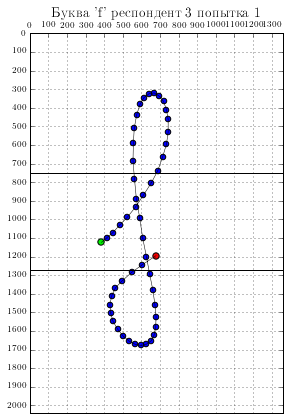

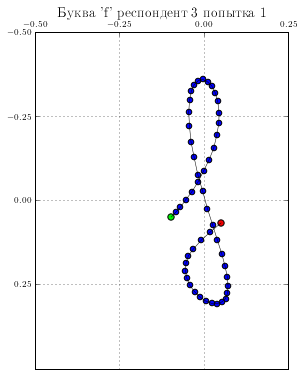

In [16]:
ind = (lexicon['f'], 2, 0)
vis_letters(ind, real_data, figsize=frame_size/3)
vis_letters3(ind, trans_real_data, figsize=frame_size/3)

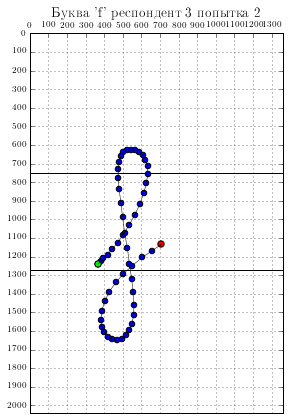

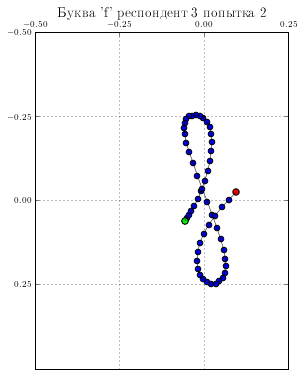

In [51]:
ind = (lexicon['f'], 2, 1)
vis_letters(ind, real_data, figsize=frame_size/3)
vis_letters3(ind, trans_real_data, figsize=frame_size/3)

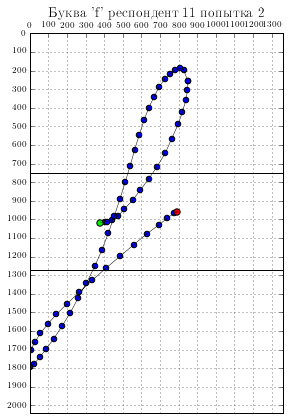

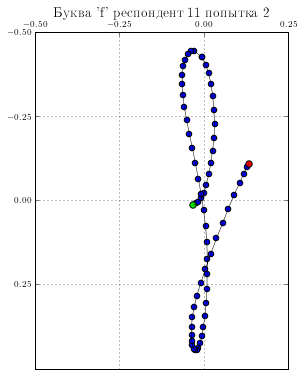

In [52]:
ind = (lexicon['f'], 10, 1)
vis_letters(ind, real_data, figsize=frame_size/3)
vis_letters3(ind, trans_real_data, figsize=frame_size/3)

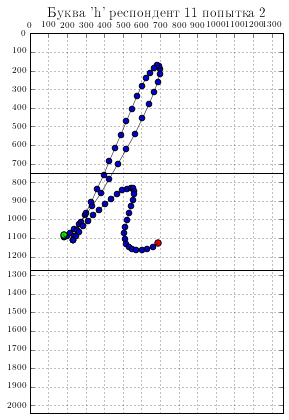

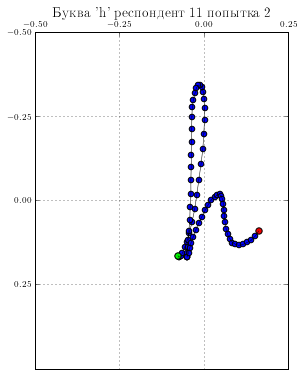

In [53]:
ind = (lexicon['h'], 10, 1)
vis_letters(ind, real_data, figsize=frame_size/3)
vis_letters3(ind, trans_real_data, figsize=frame_size/3)

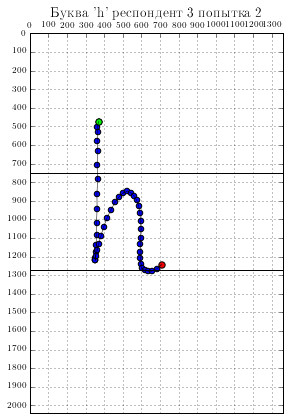

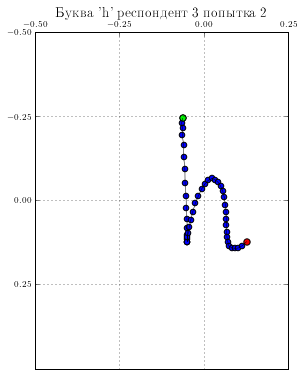

In [55]:
ind = (lexicon['h'], 2, 1)
vis_letters(ind, real_data, figsize=frame_size/3)
vis_letters3(ind, trans_real_data, figsize=frame_size/3)

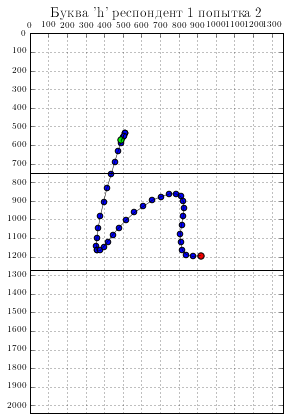

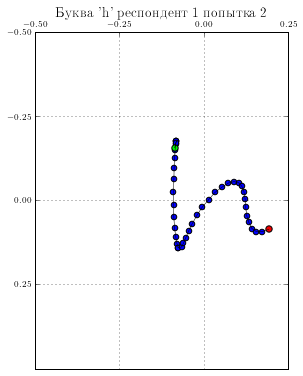

In [56]:
ind = (lexicon['h'], 0, 1)
vis_letters(ind, real_data, figsize=frame_size/3)
vis_letters3(ind, trans_real_data, figsize=frame_size/3)

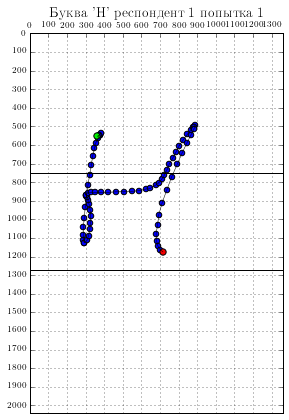

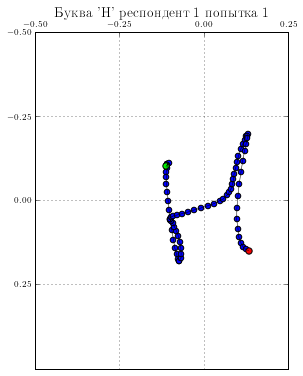

In [62]:
ind = (lexicon['H'], 0, 0)
vis_letters(ind, real_data, figsize=frame_size/3)
vis_letters3(ind, trans_real_data, figsize=frame_size/3)

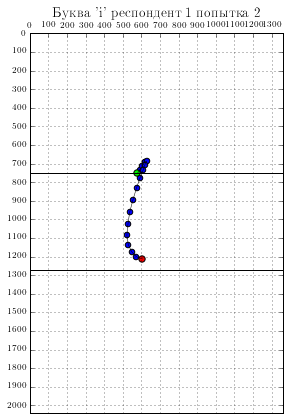

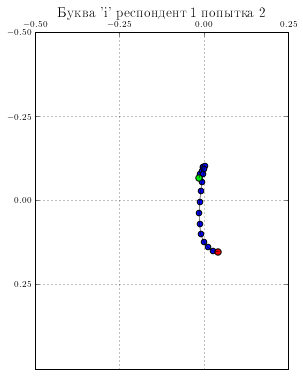

In [58]:
ind = (lexicon['i'], 0, 1)
vis_letters(ind, real_data, figsize=frame_size/3)
vis_letters3(ind, trans_real_data, figsize=frame_size/3)

#### Исходные символы

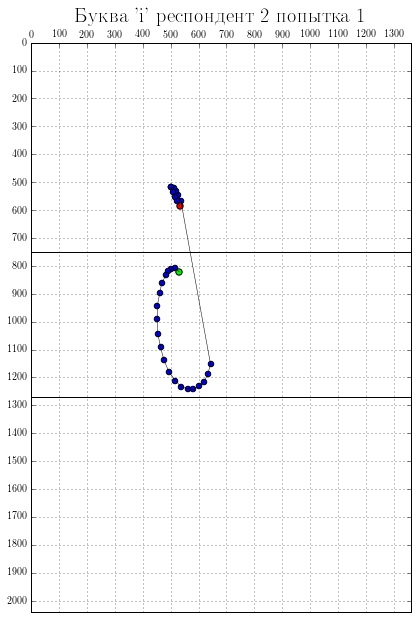

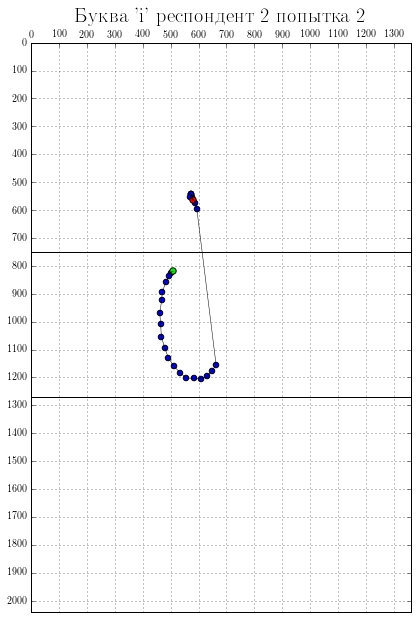

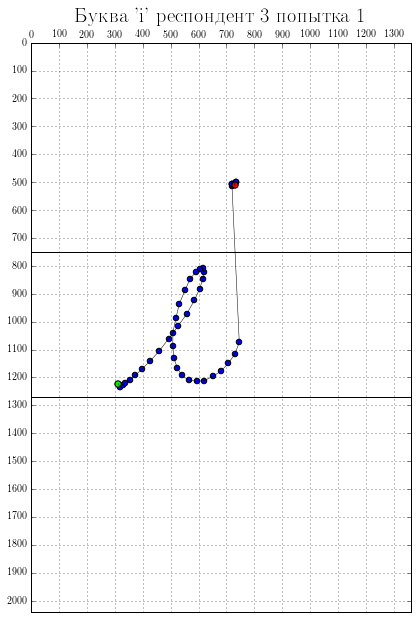

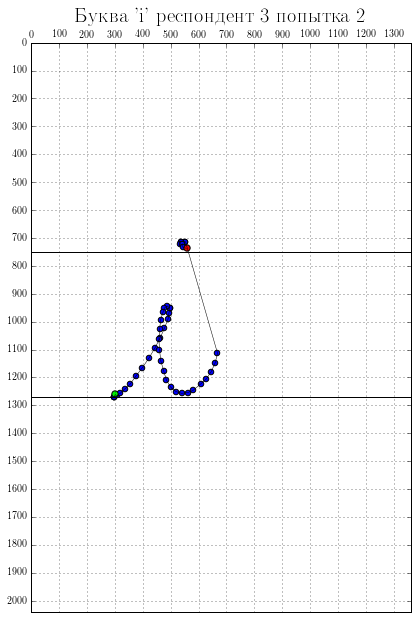

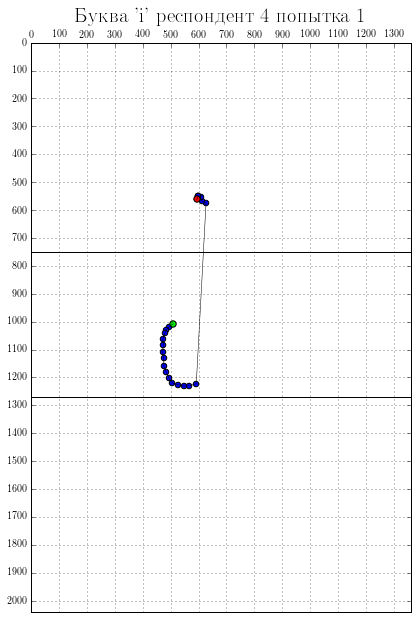

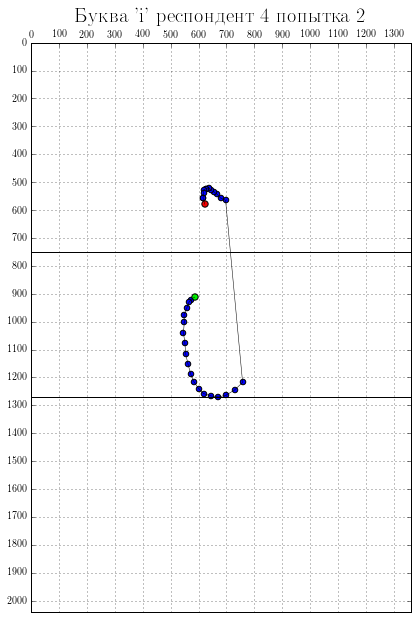

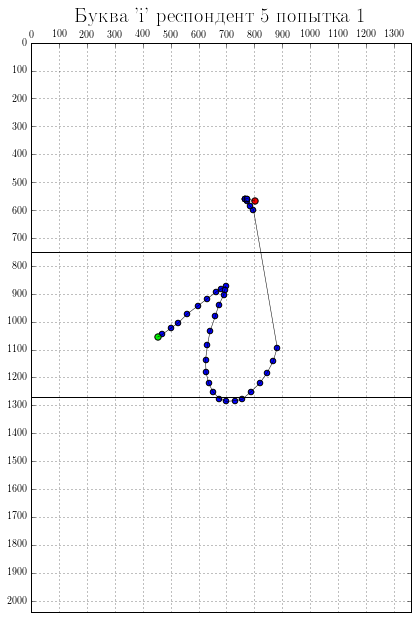

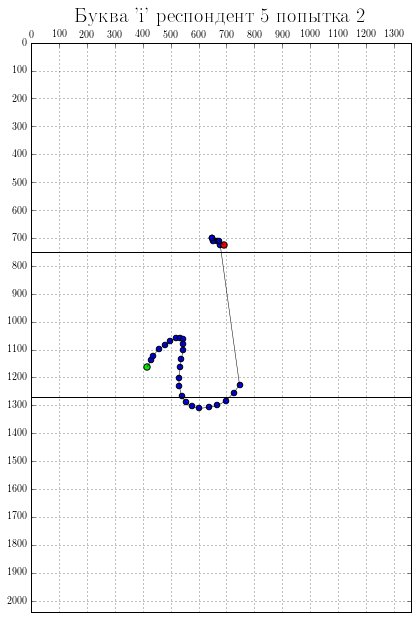

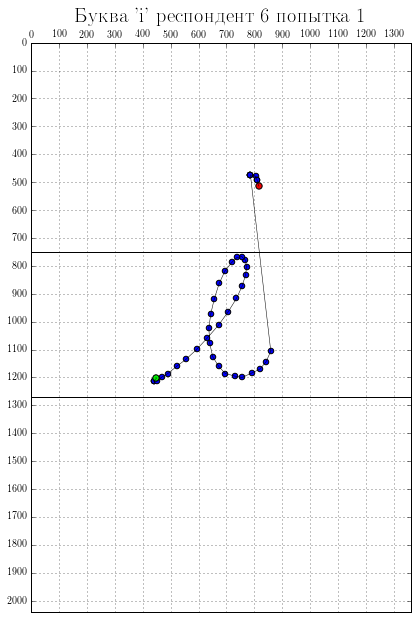

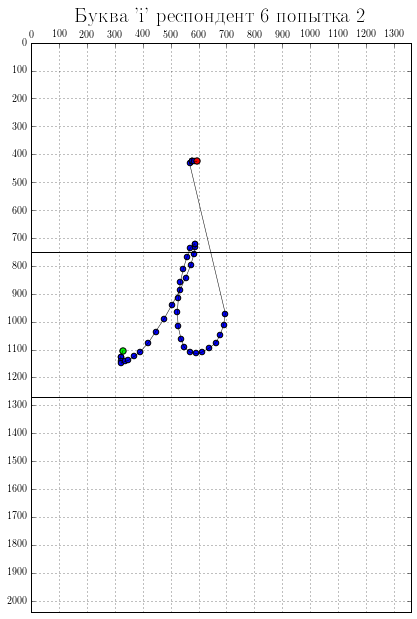

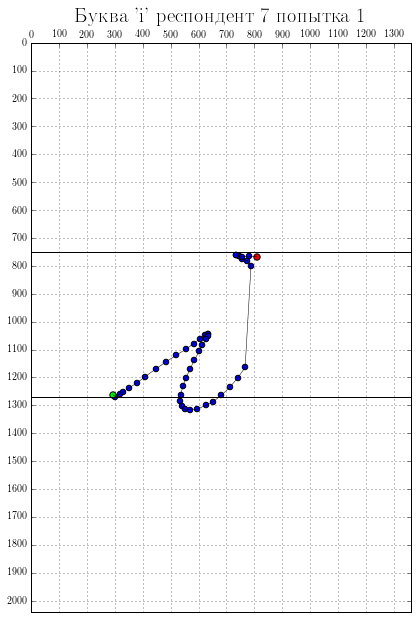

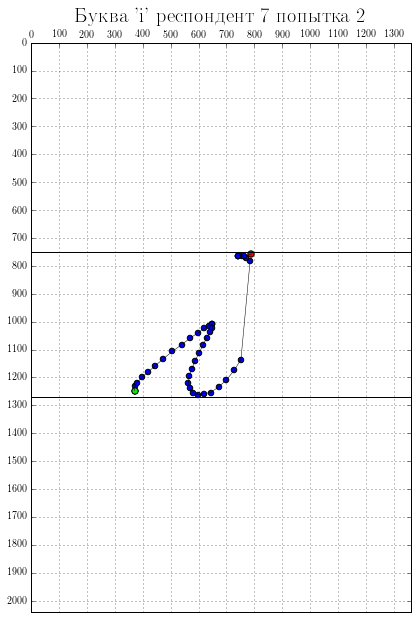

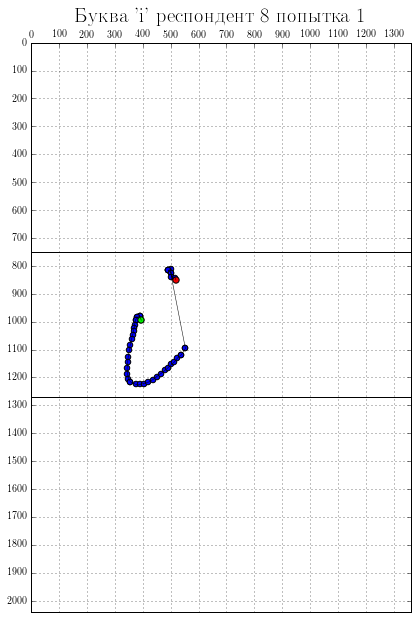

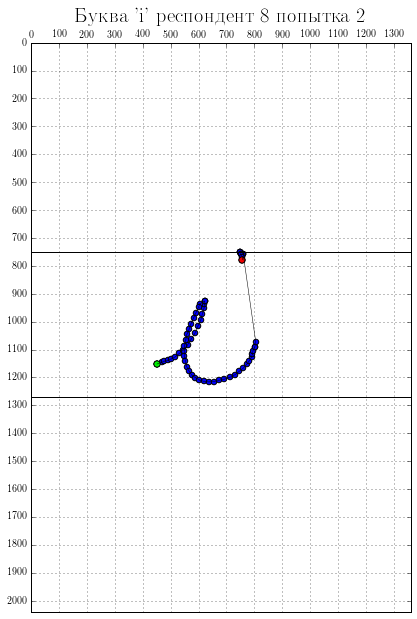

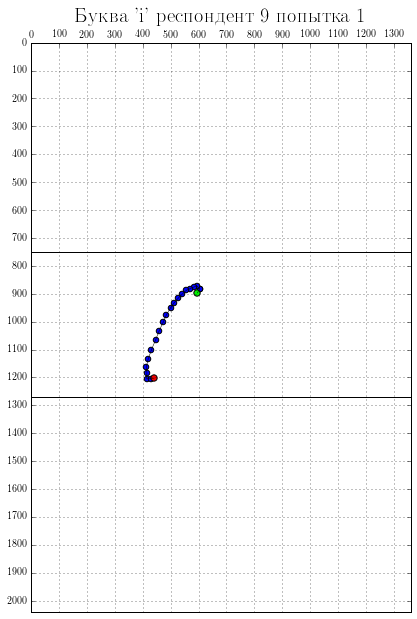

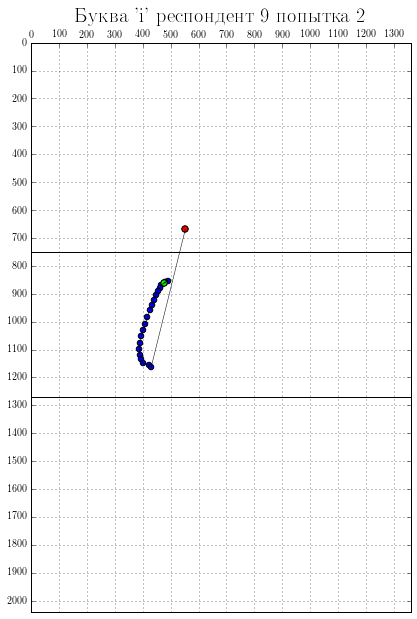

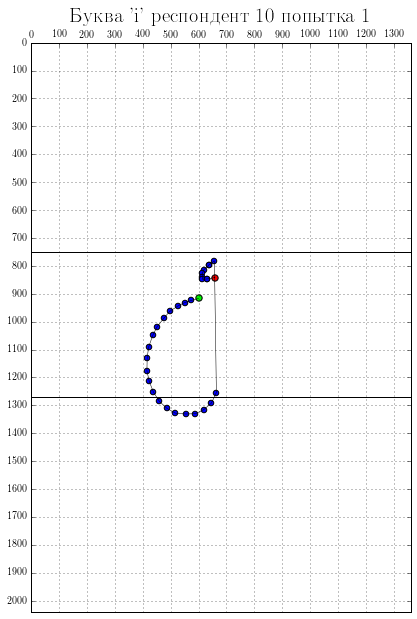

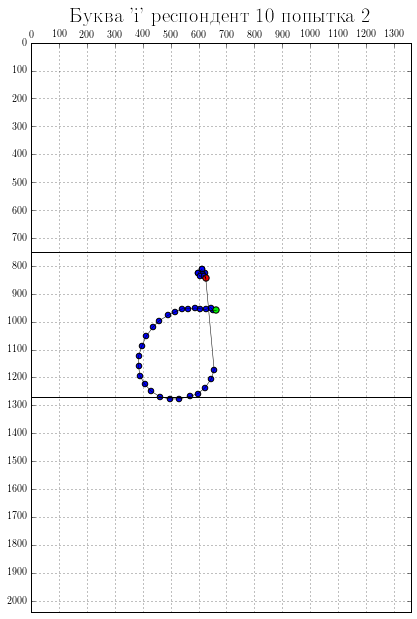

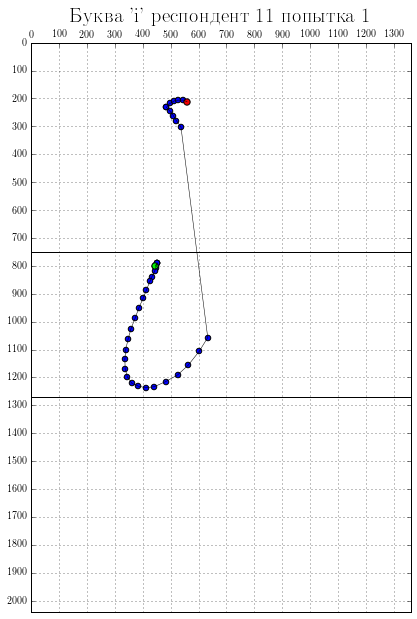

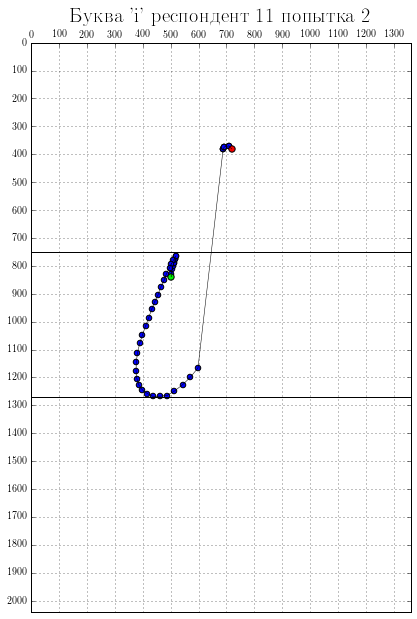

In [16]:
for writer in range(1, 11, 1):
    for repet in range(2):
        vis_letters((lexicon['i'], writer, repet), real_data)

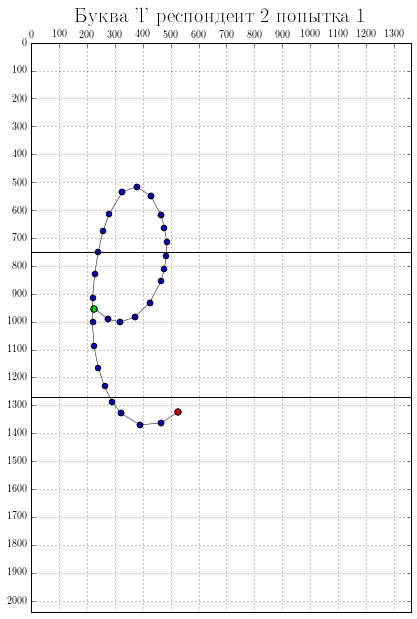

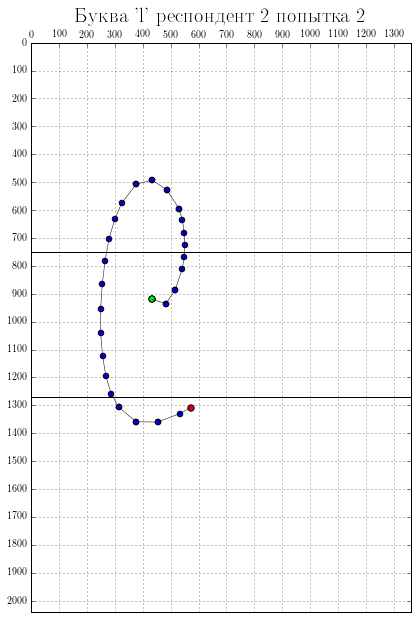

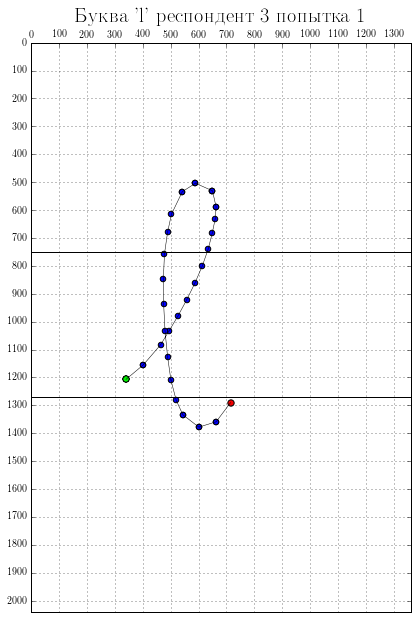

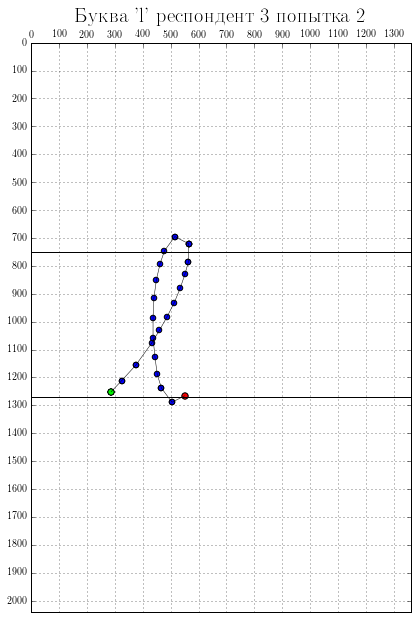

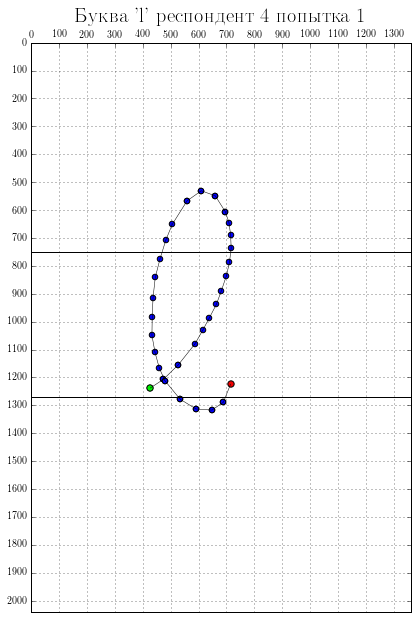

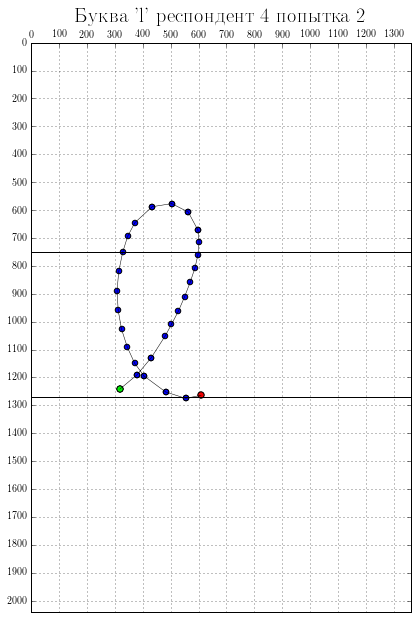

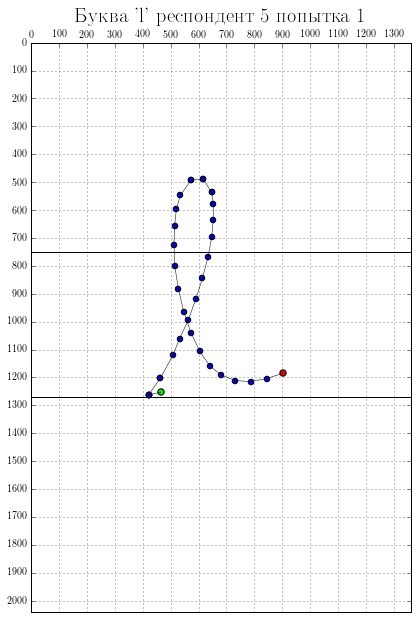

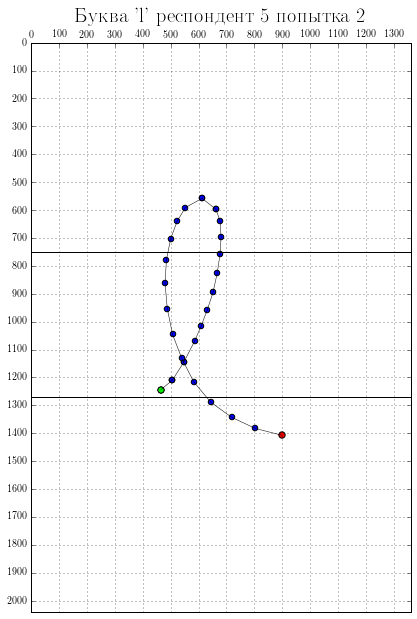

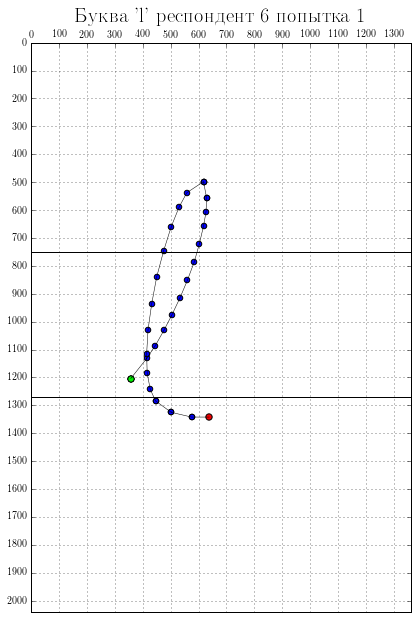

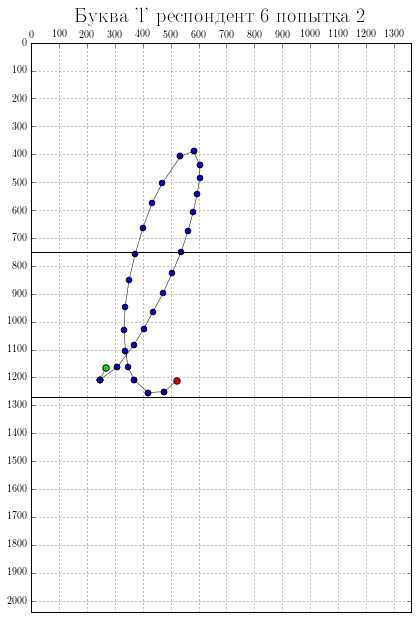

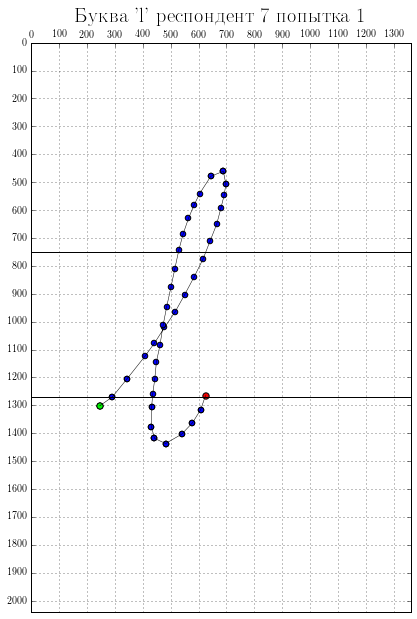

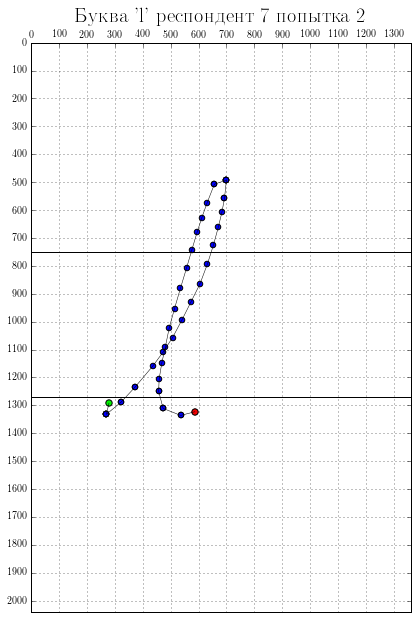

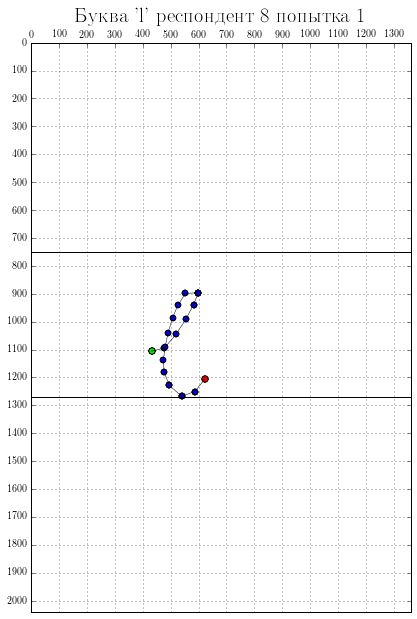

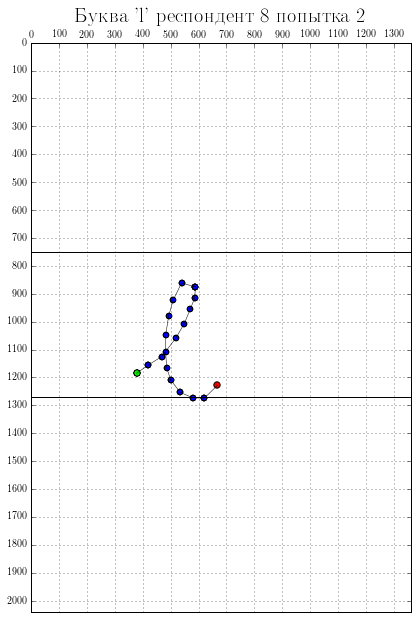

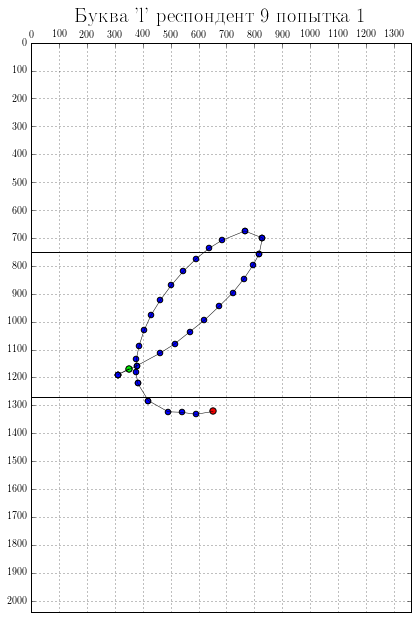

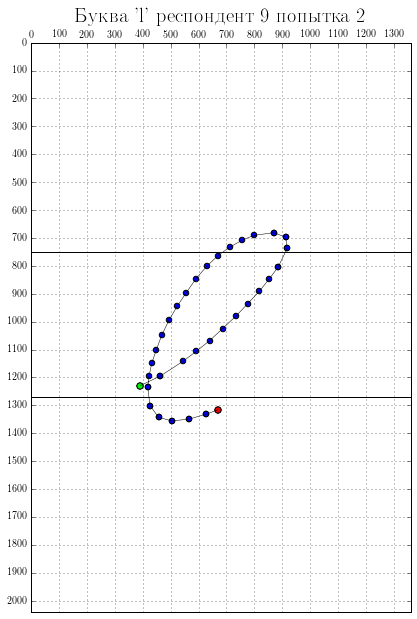

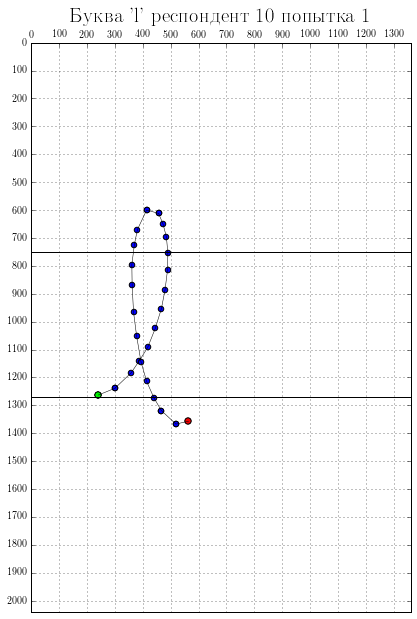

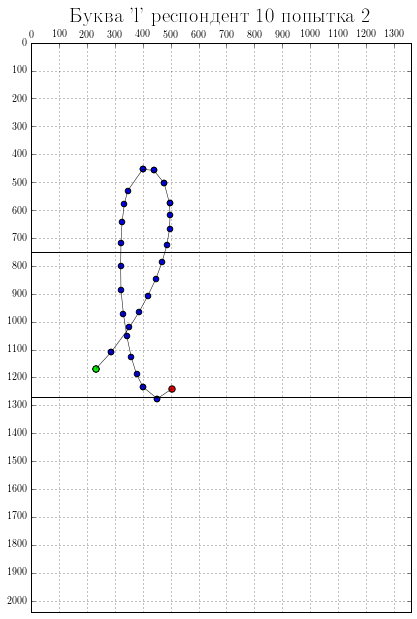

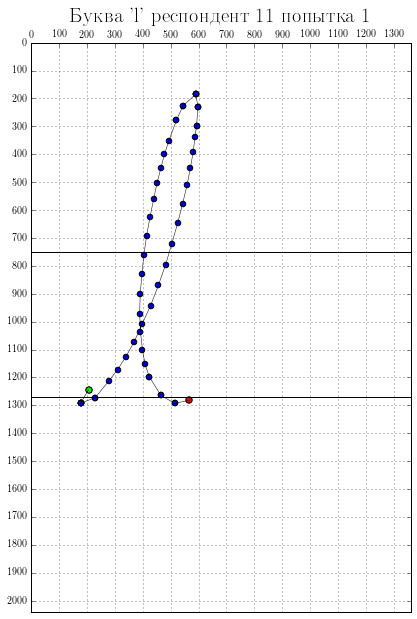

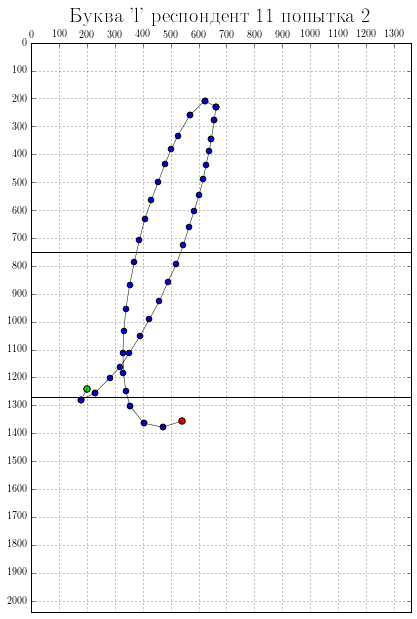

In [17]:
for writer in range(1, 11, 1):
    for repet in range(2):
        vis_letters((lexicon['l'], writer, repet), real_data)

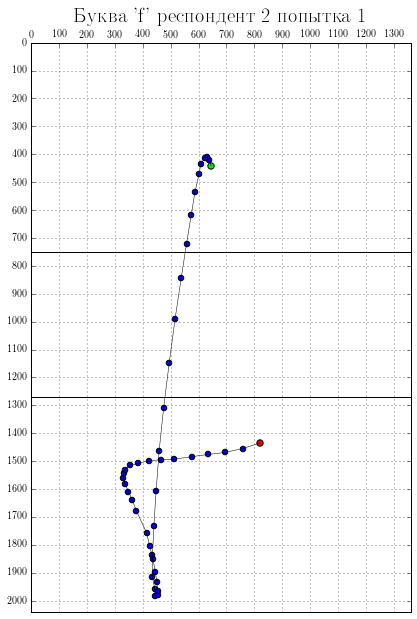

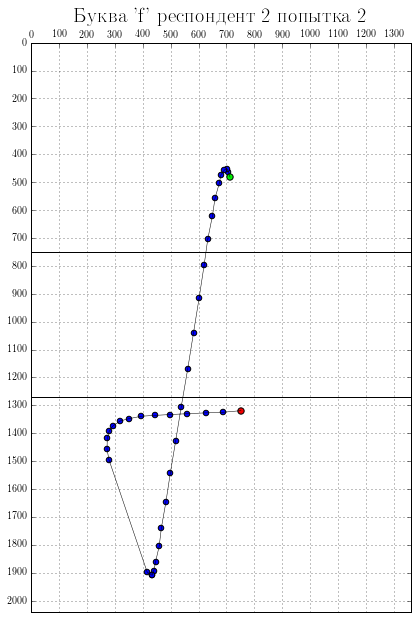

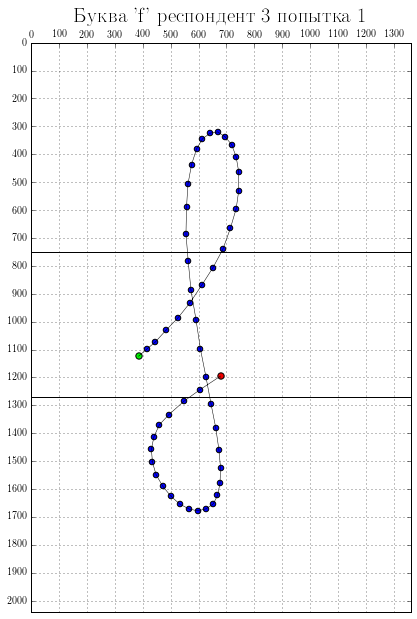

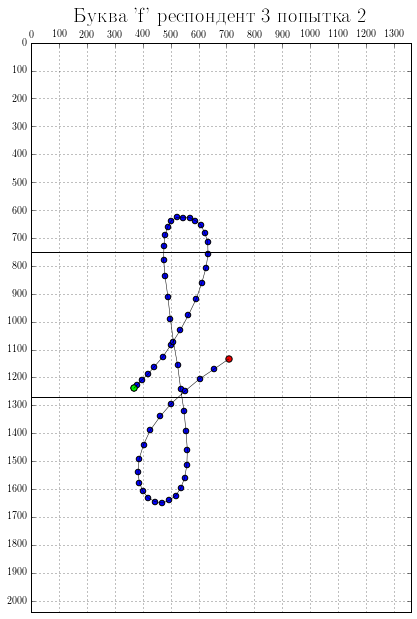

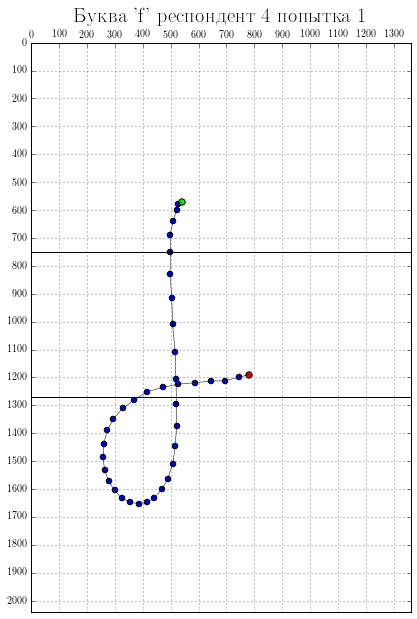

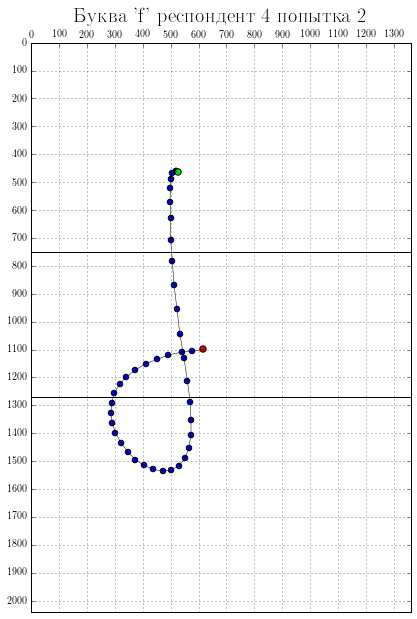

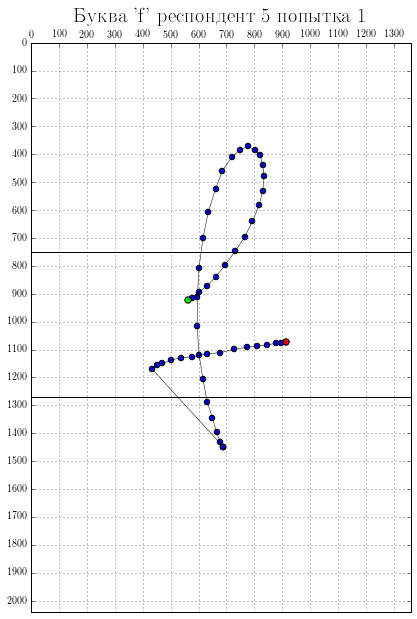

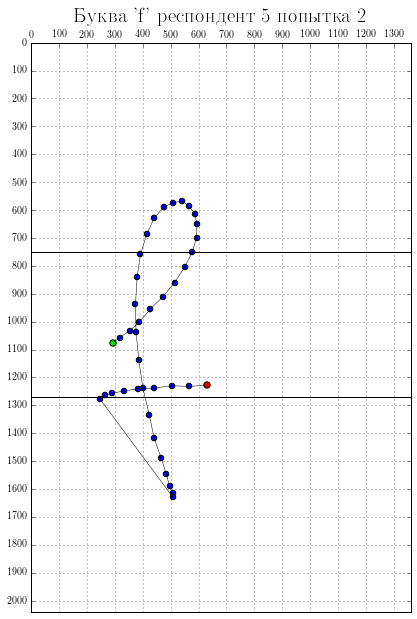

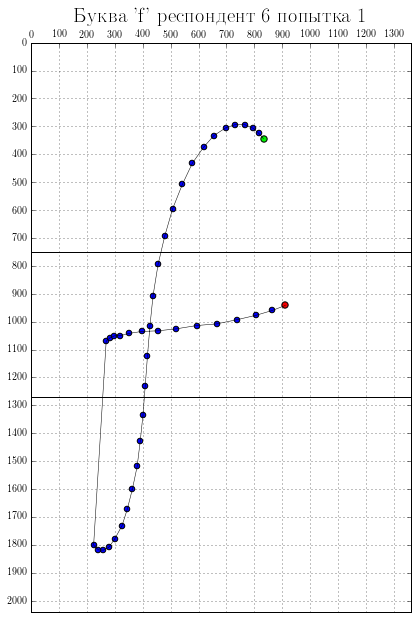

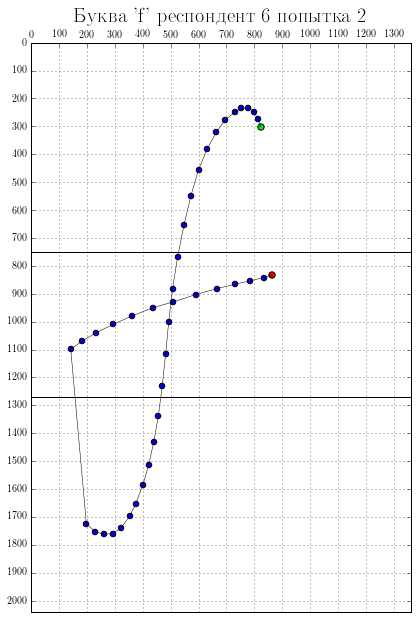

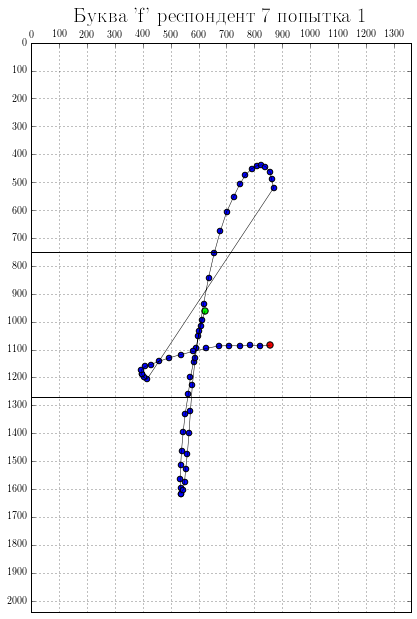

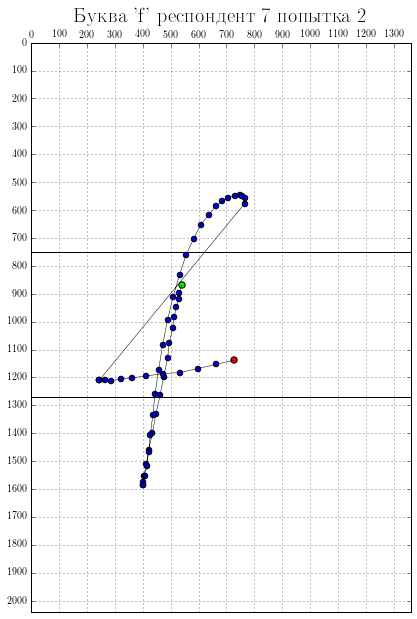

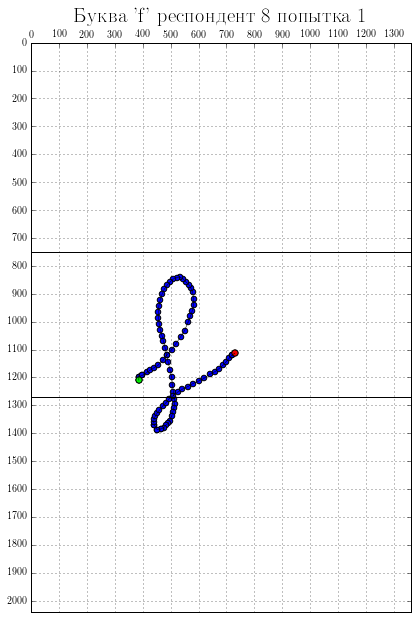

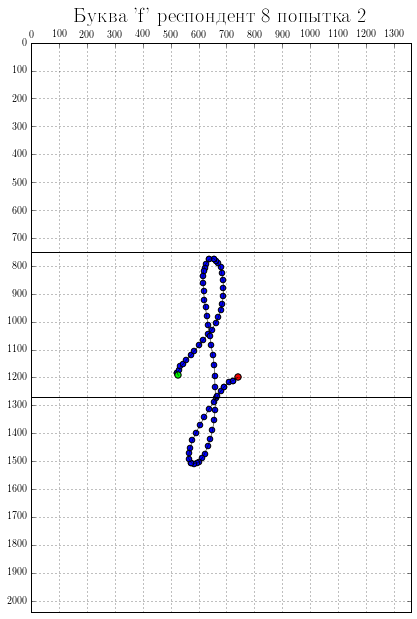

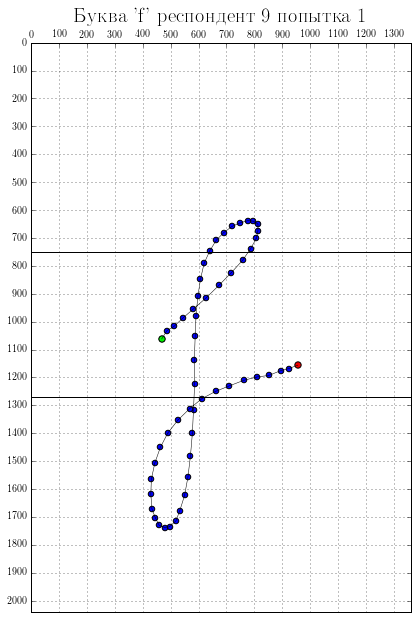

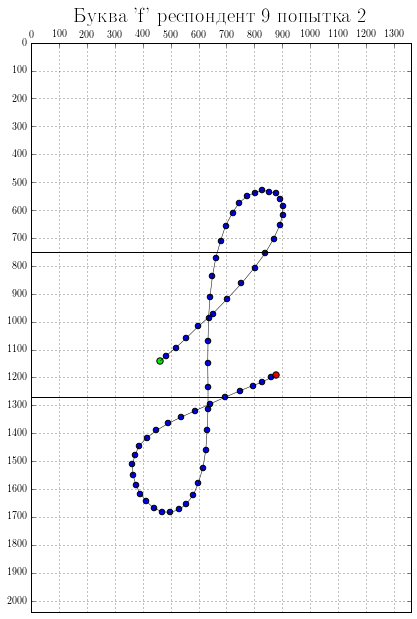

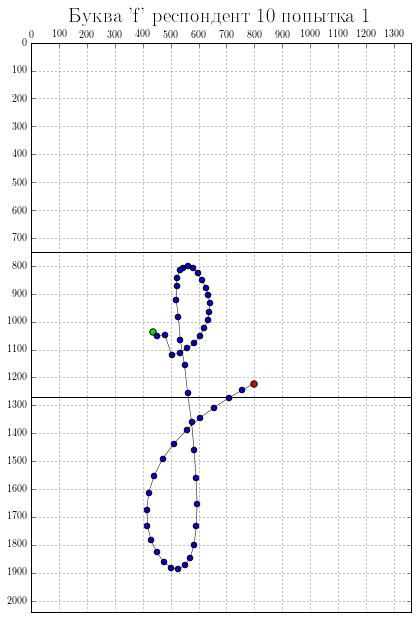

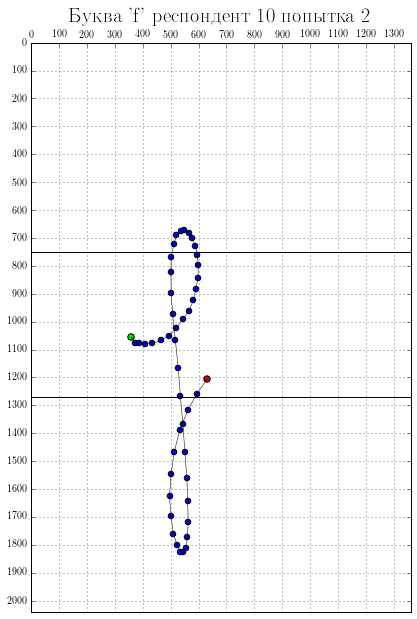

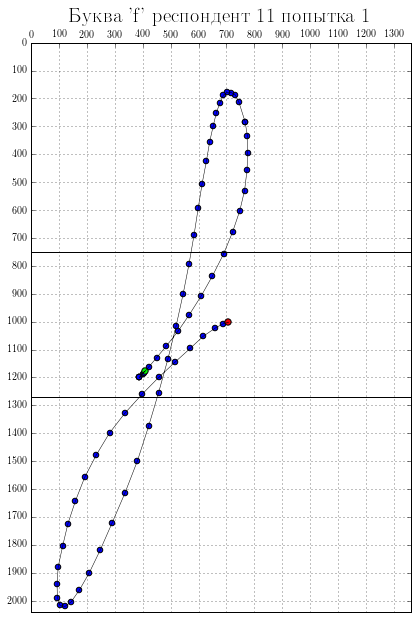

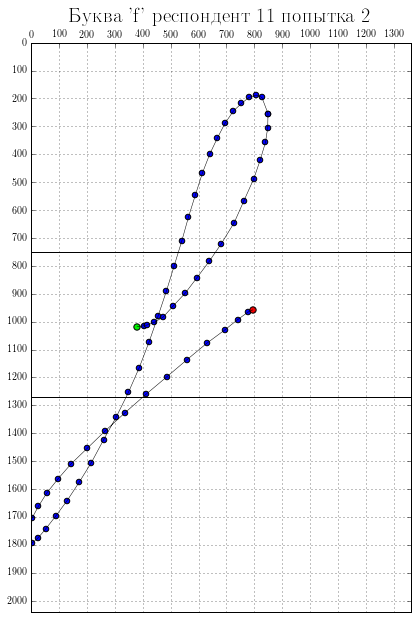

In [18]:
for writer in range(1, 11, 1):
    for repet in range(2):
        vis_letters((lexicon['f'], writer, repet), real_data)

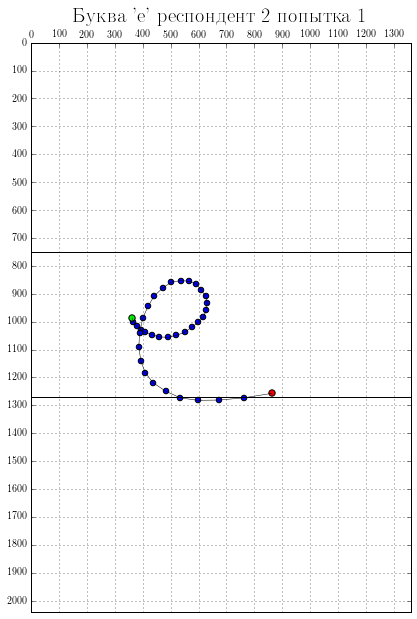

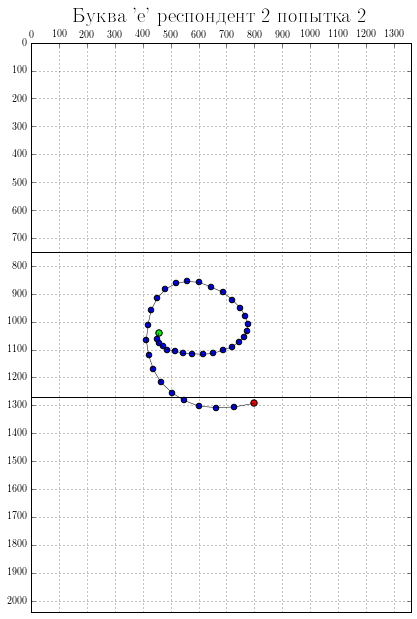

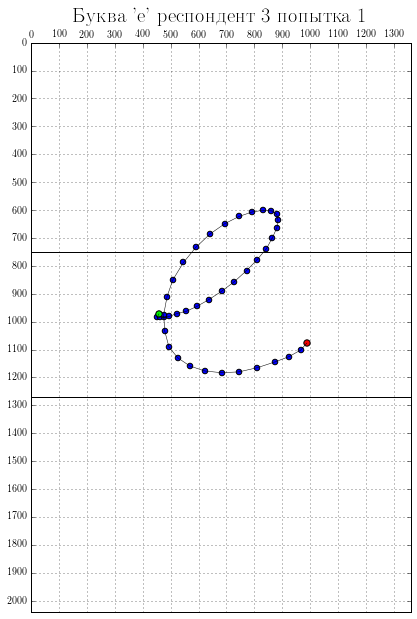

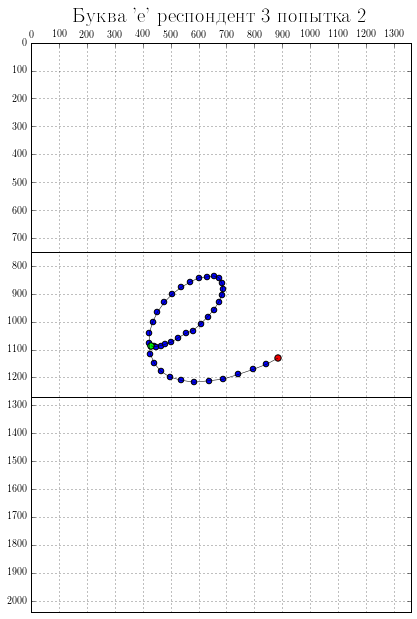

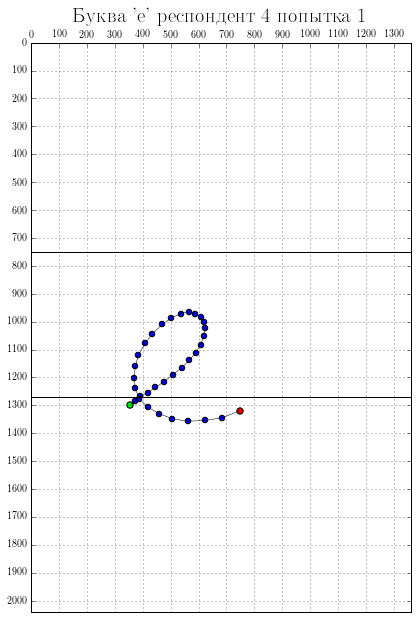

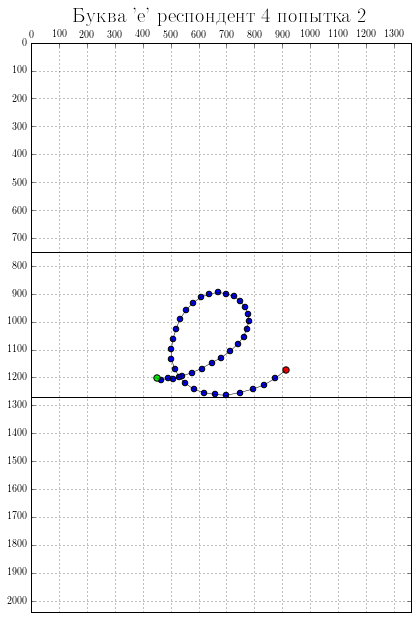

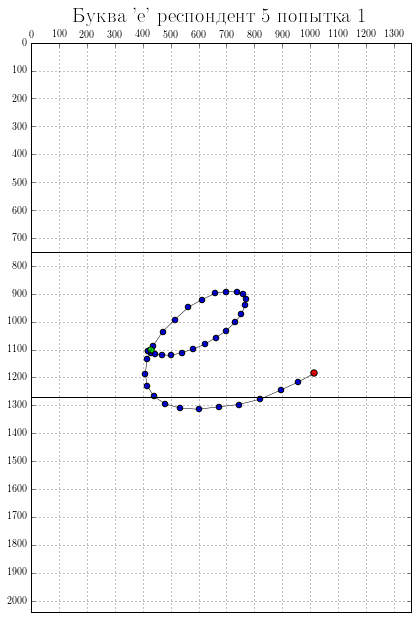

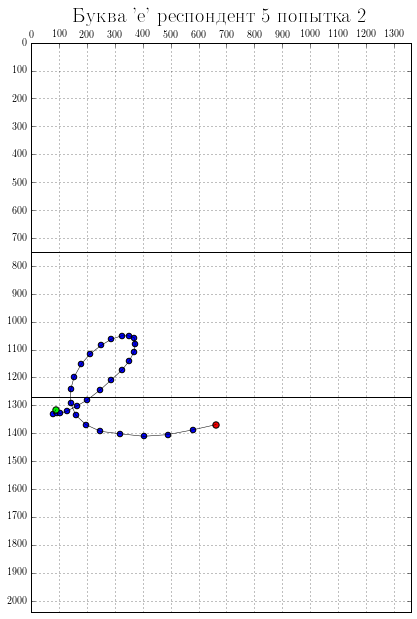

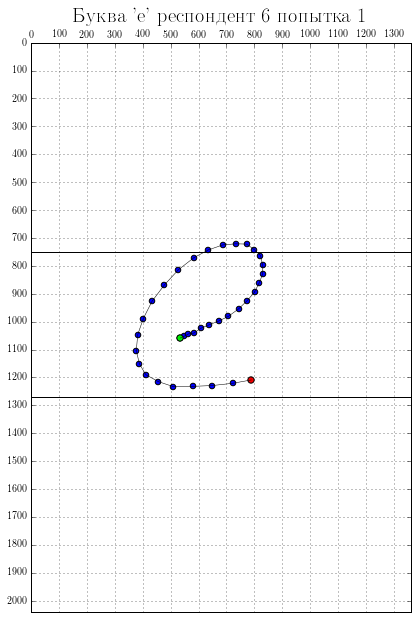

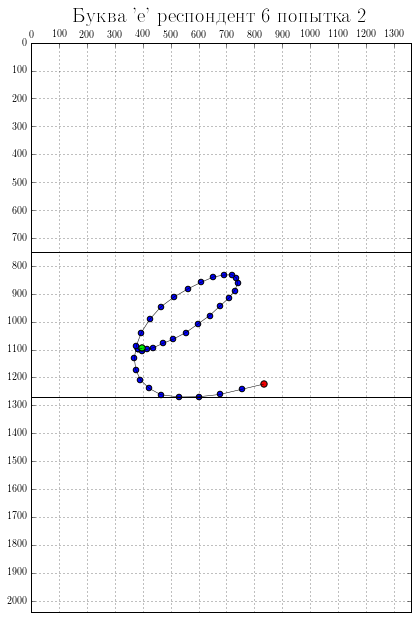

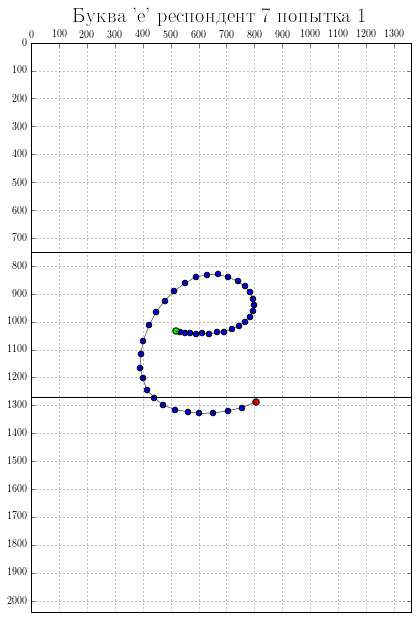

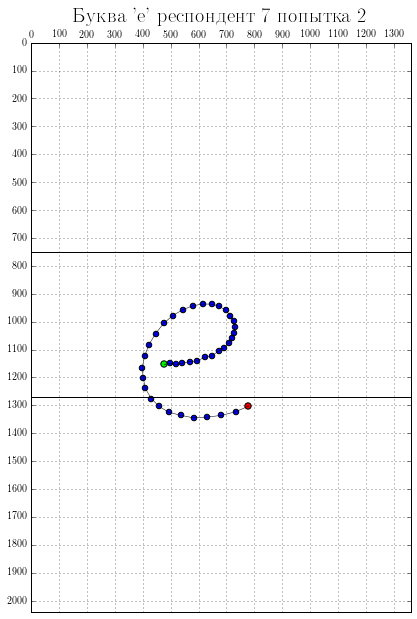

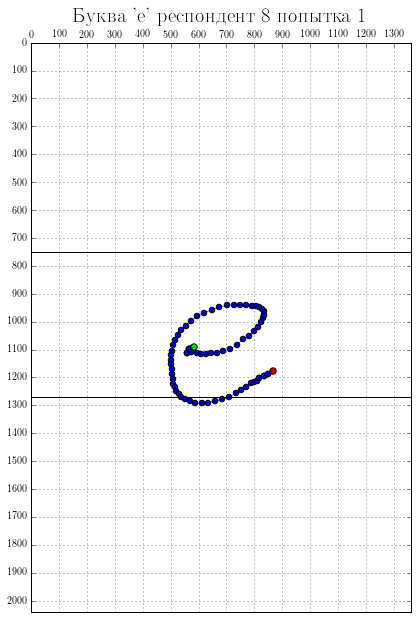

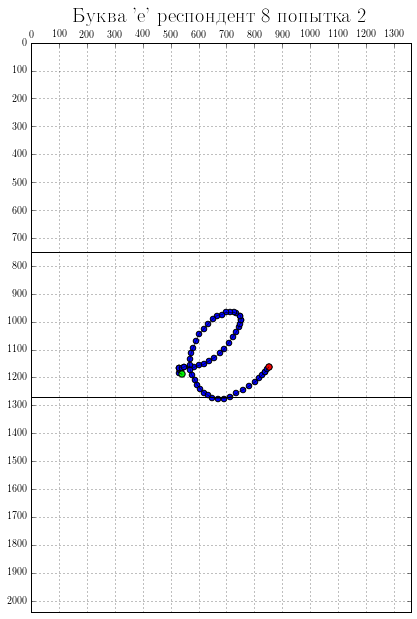

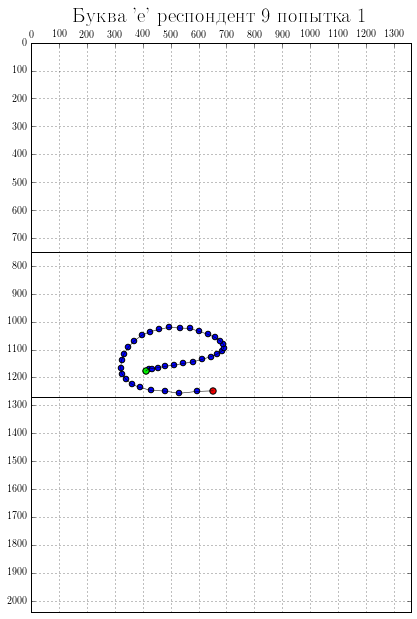

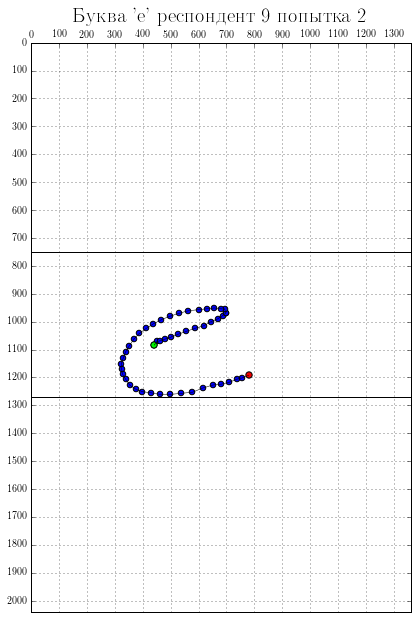

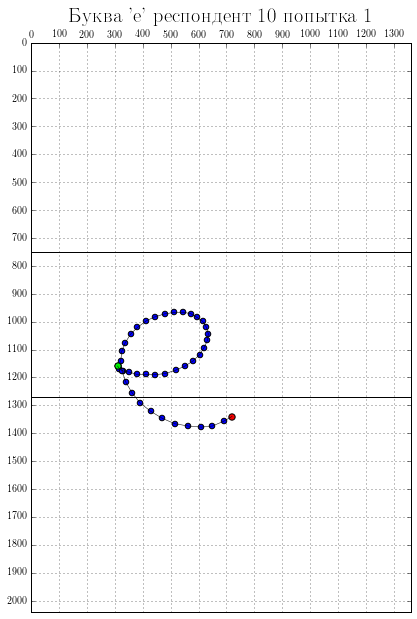

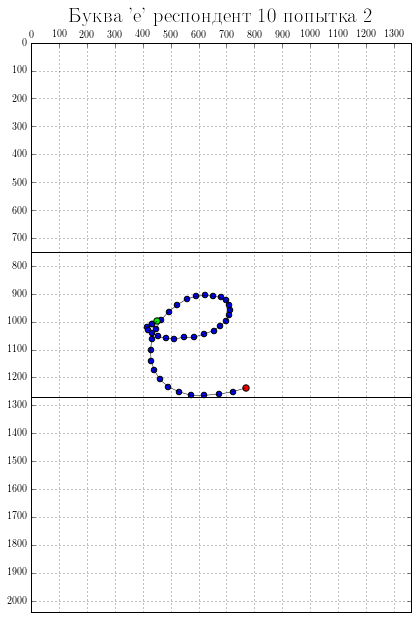

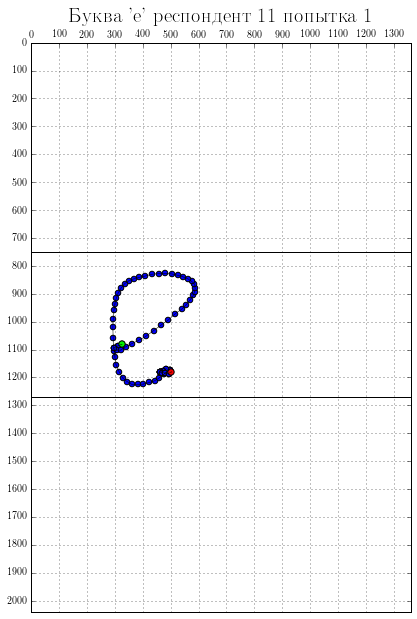

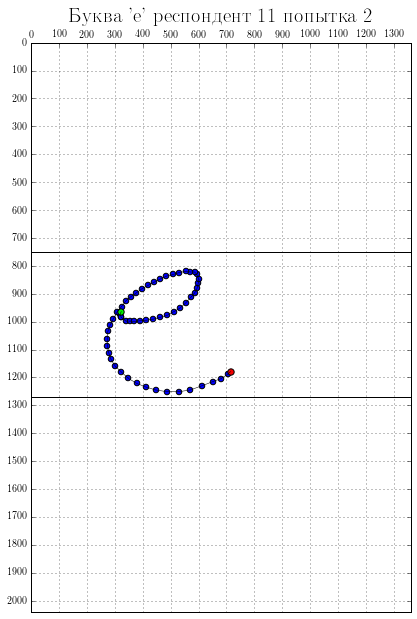

In [19]:
for writer in range(1, 11, 1):
    for repet in range(2):
        vis_letters((lexicon['e'], writer, repet), real_data)

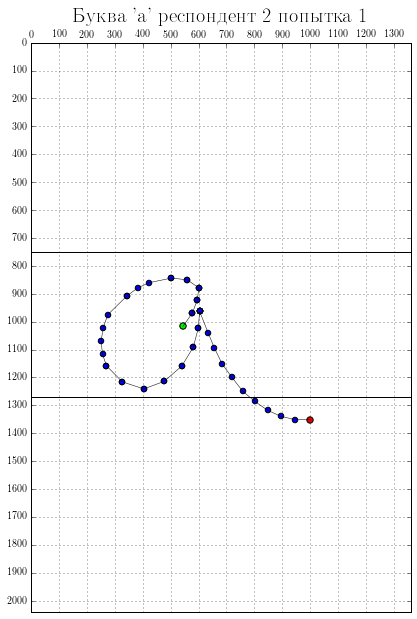

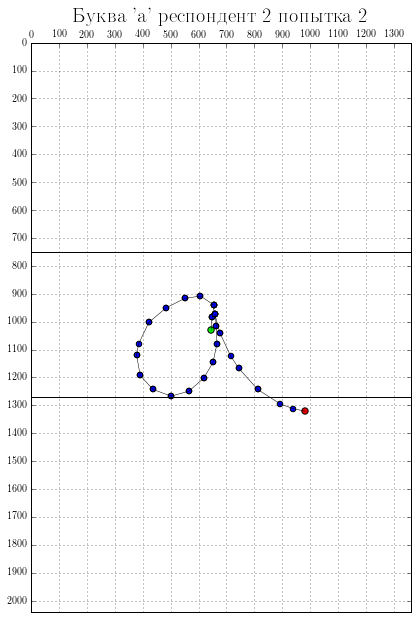

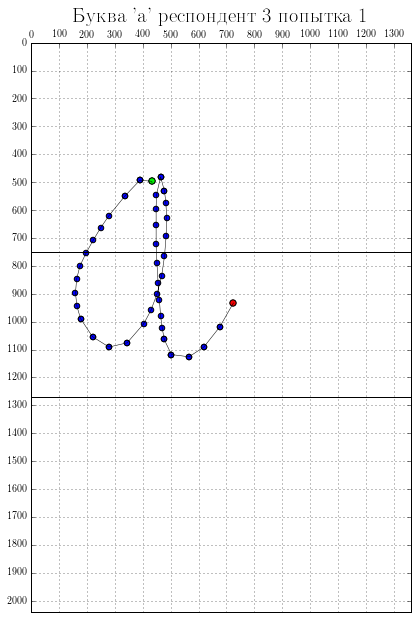

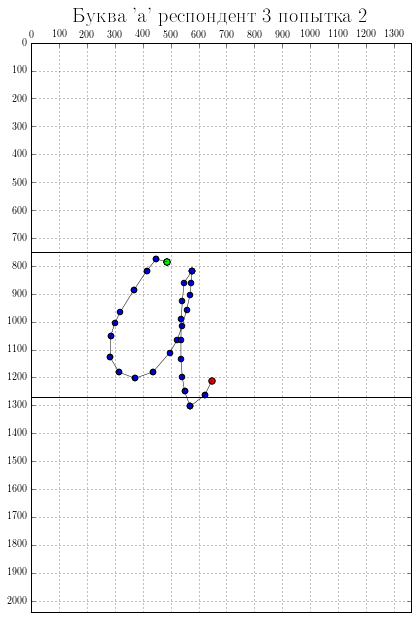

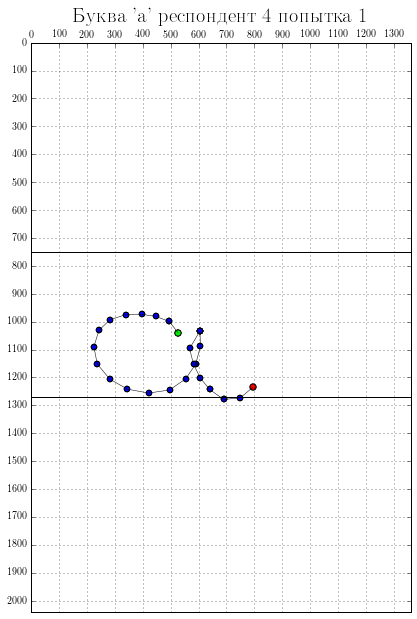

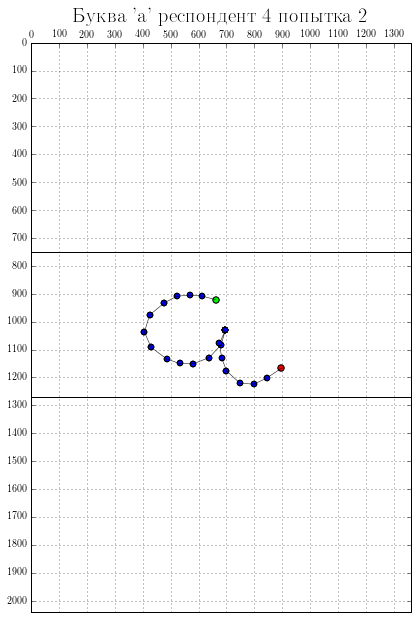

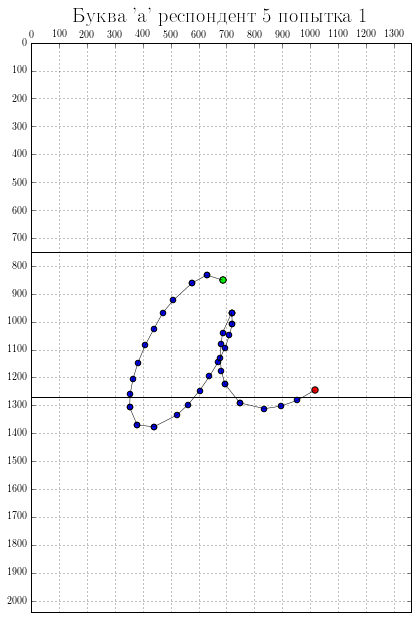

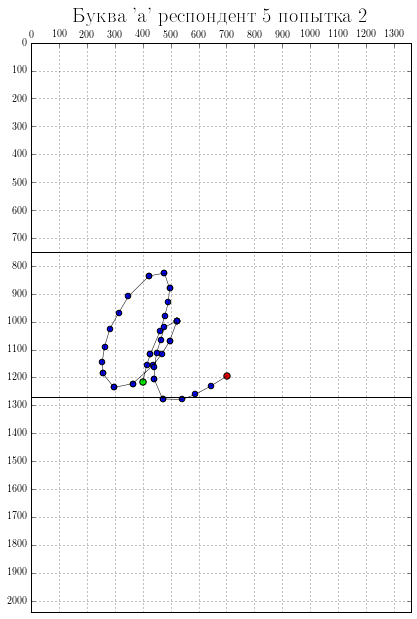

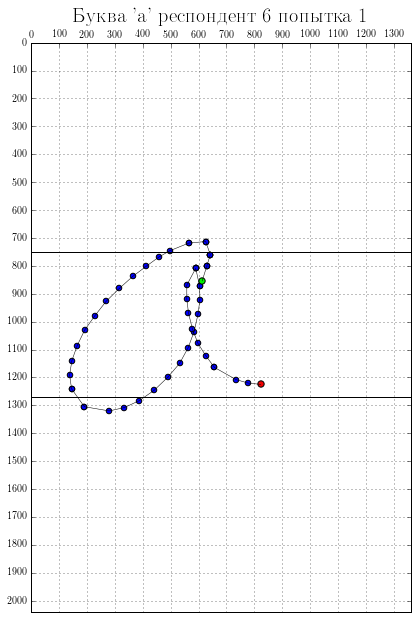

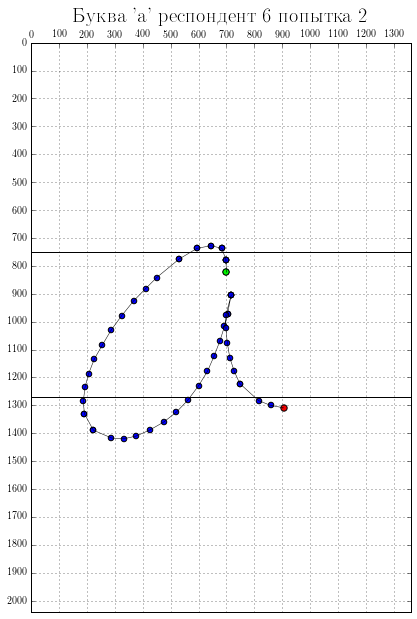

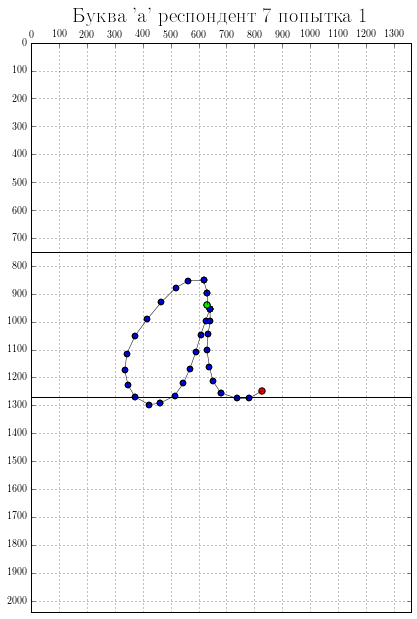

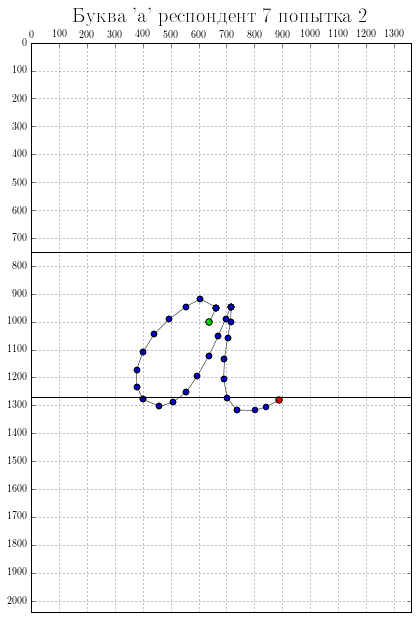

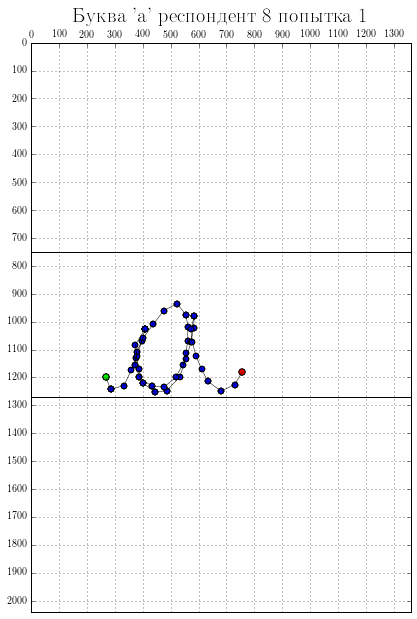

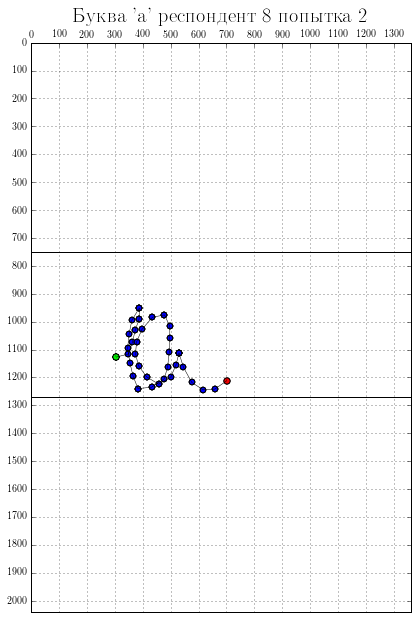

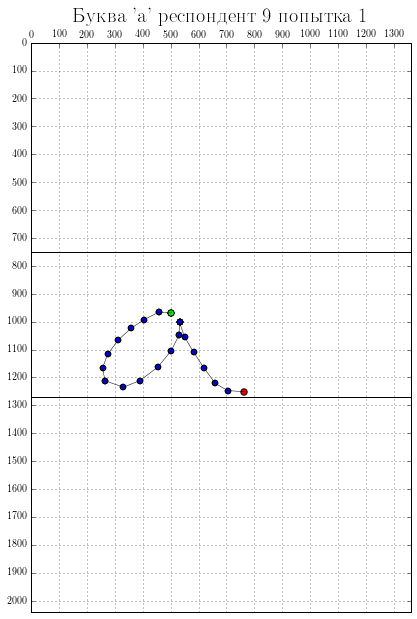

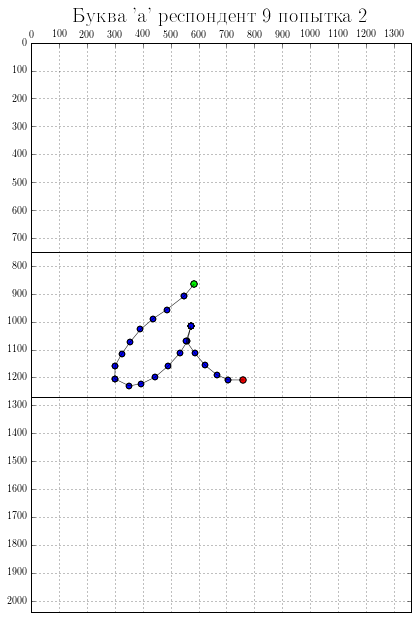

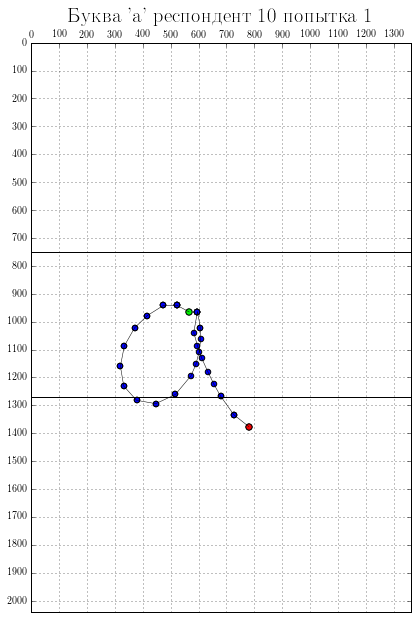

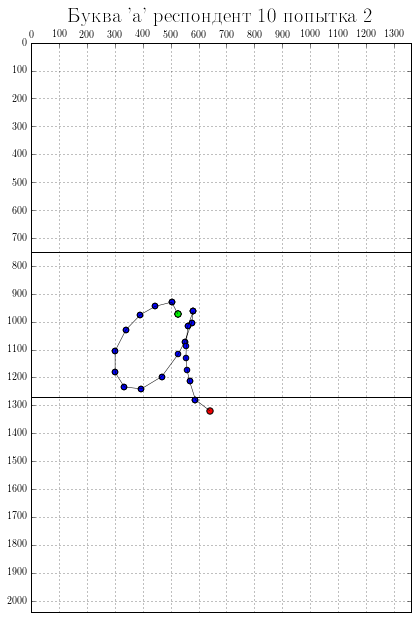

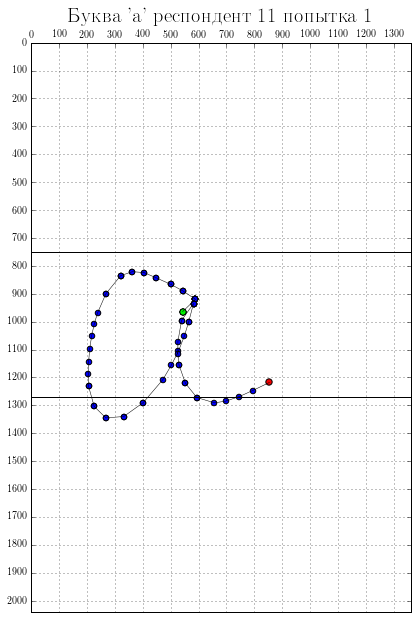

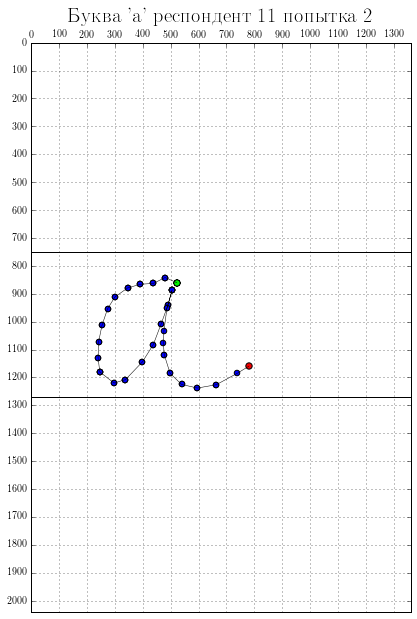

In [20]:
for writer in range(1, 11, 1):
    for repet in range(2):
        vis_letters((lexicon['a'], writer, repet), real_data)

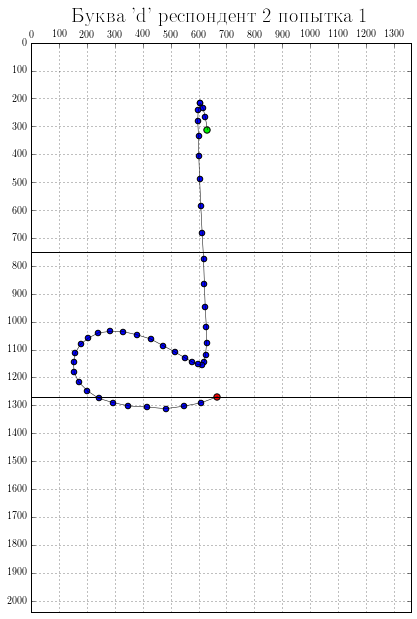

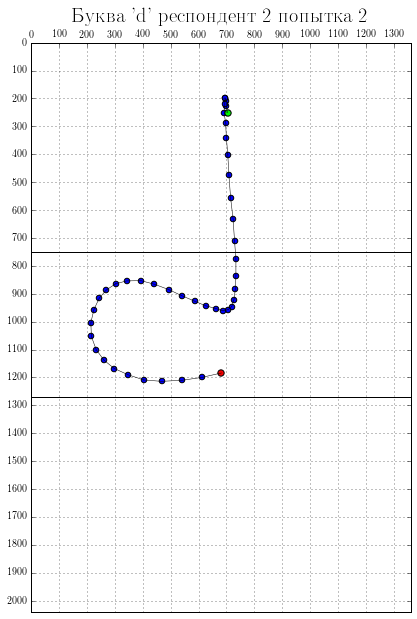

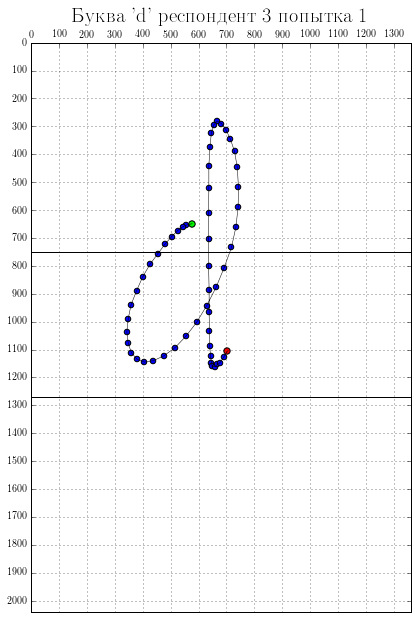

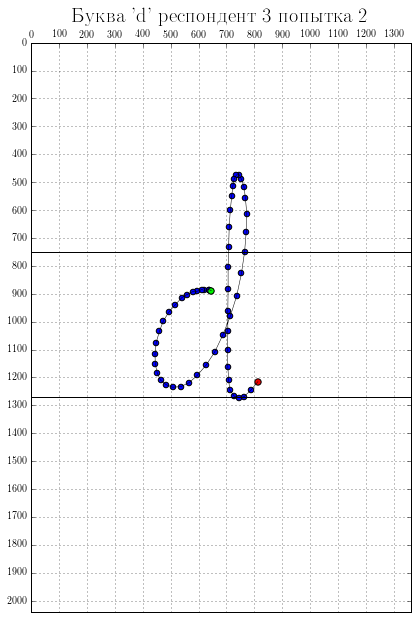

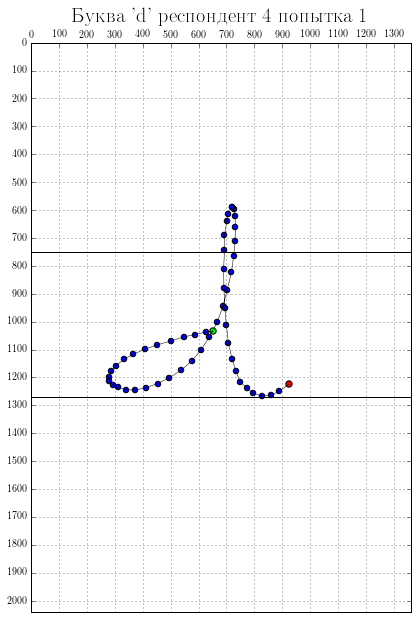

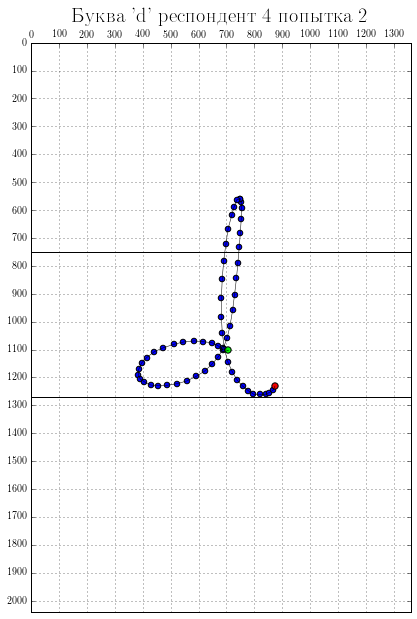

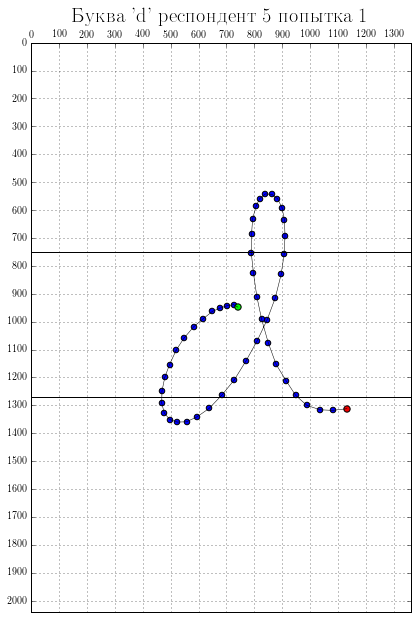

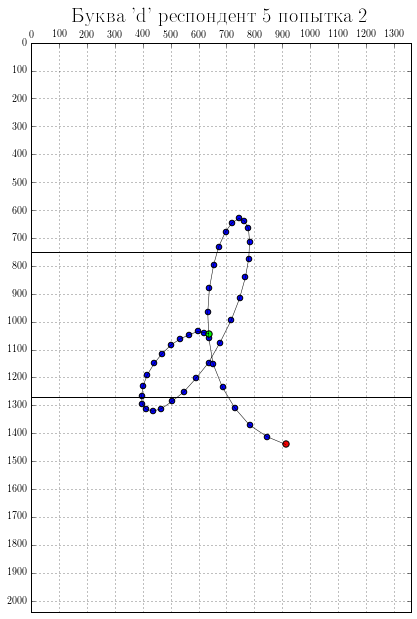

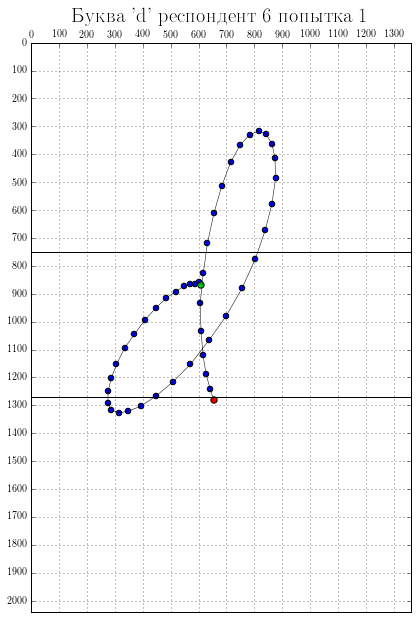

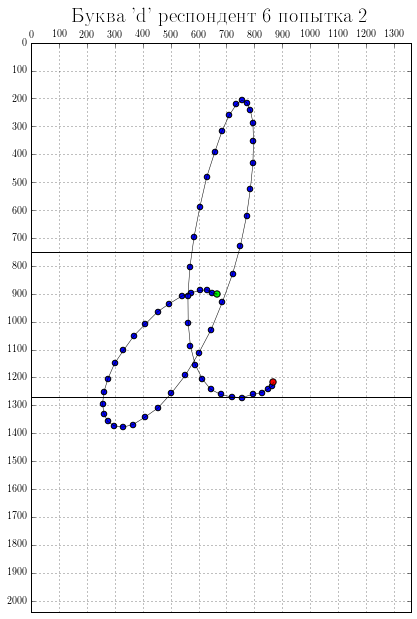

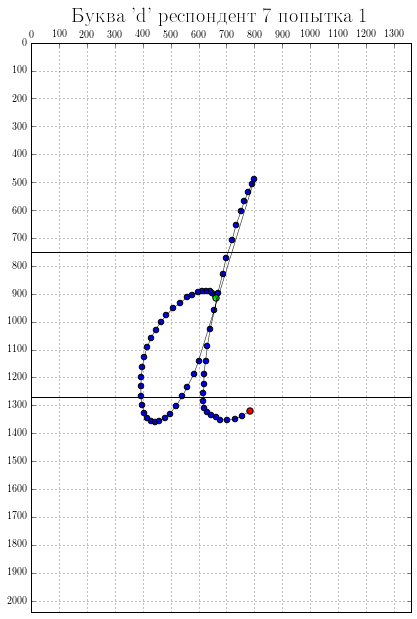

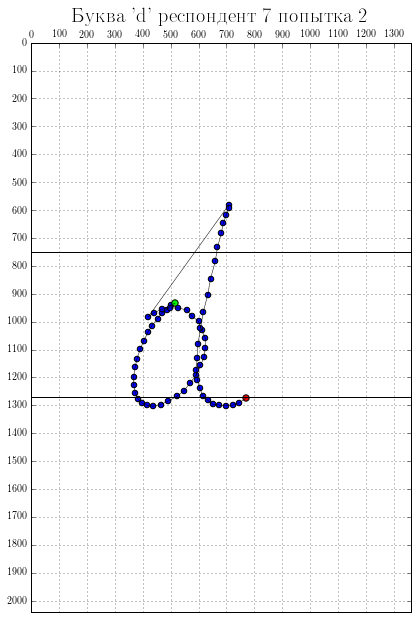

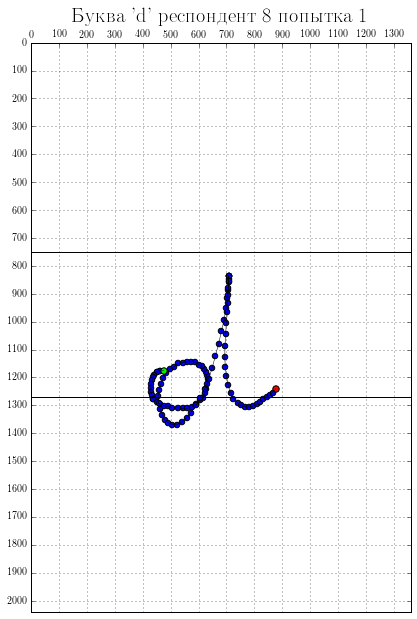

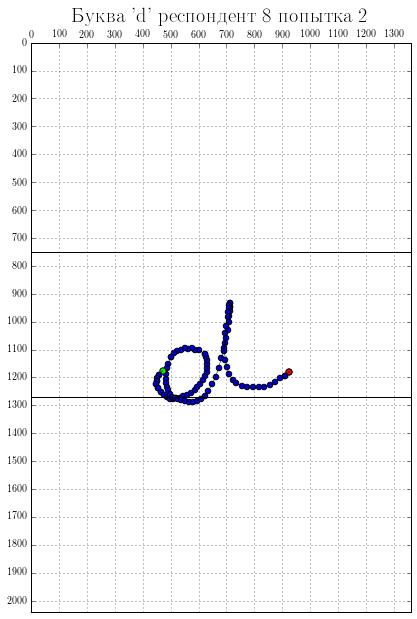

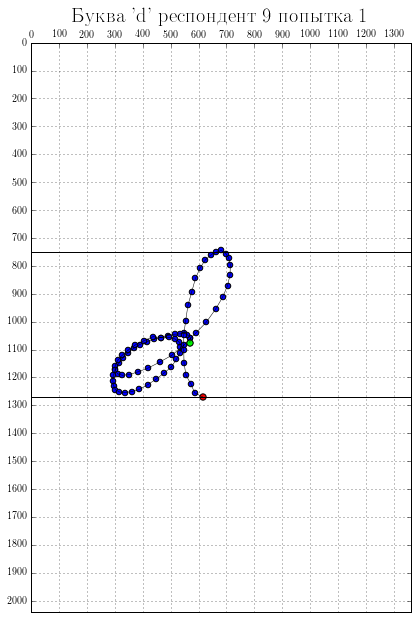

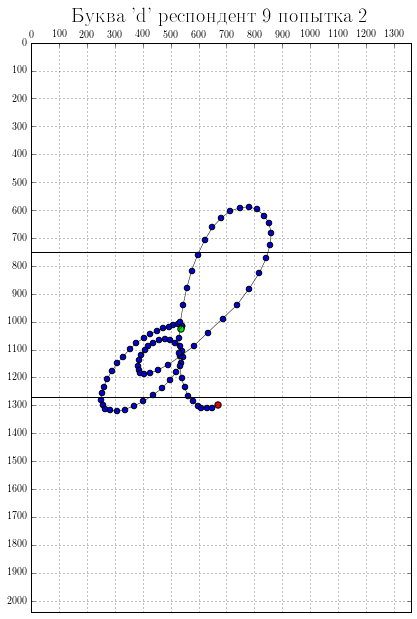

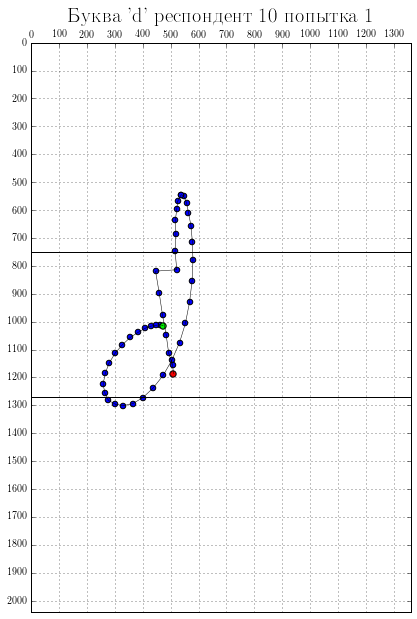

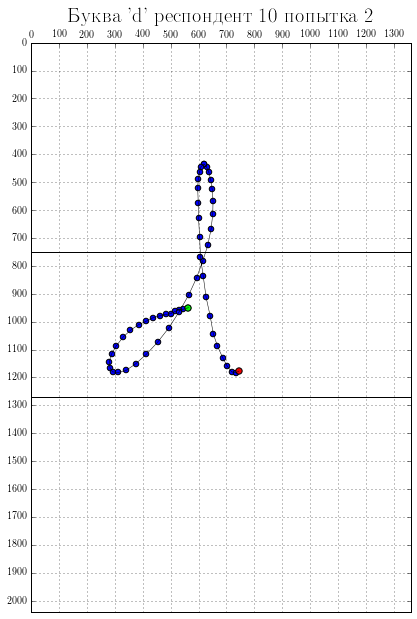

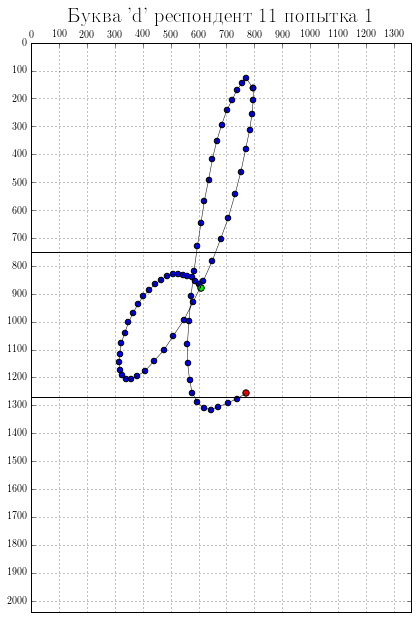

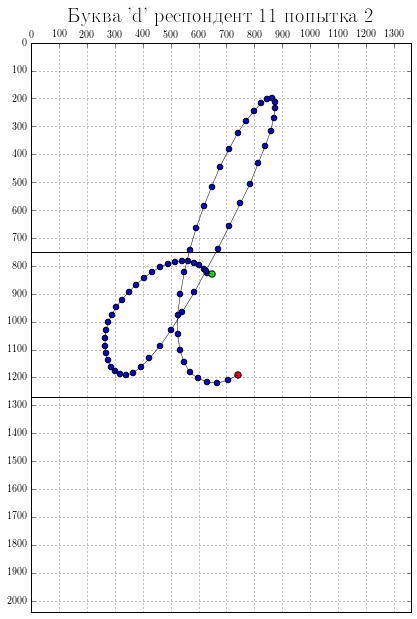

In [21]:
for writer in range(1, 11, 1):
    for repet in range(2):
        vis_letters((lexicon['d'], writer, repet), real_data)

## Making DTW preprocessing

In [102]:
64*1360**2/2  / 3600 / 1000

16.44088888888889

In [99]:
ind = [(lexicon['y'], 2, 0), (lexicon['y'], 2, 1)]
a = trans_real_data[ind[0]].compressed().reshape(2, -1).T
b = trans_real_data[ind[1]].compressed().reshape(2, -1).T
%timeit dist, D = sigproc.dtw(a, b, do_path=False)

10 loops, best of 3: 64.8 ms per loop


In [89]:
def test(real_data, index_list):
    for ind in index_list:
        a = real_data[ind[0]].compressed().reshape(2, -1).T
        b = real_data[ind[1]].compressed().reshape(2, -1).T
        tm = time.time()
        dist, D = sigproc.dtw(a, b, do_path=False)
        tm = time.time() - tm;
        print("Буква '{0:s}'\tреспондент {1:d}\tпопытка 0 и 1: \t{2:.3f}".format(
                anti_lexicon[ind[0][0]], ind[0][1] + 1, dist))
        print("Время: {} сек".format(tm))

In [98]:
index_list = [[(lexicon['y'], wr-1, 0), (lexicon['y'], wr-1, 1)] for wr in [2, 22,32]]
test(trans_real_data_full, index_list)

Буква 'y'	респондент 2	попытка 0 и 1: 	3.289
Время: 0.09904766082763672 сек
Буква 'y'	респондент 22	попытка 0 и 1: 	1.601
Время: 0.06021428108215332 сек
Буква 'y'	респондент 32	попытка 0 и 1: 	1.217
Время: 0.03963112831115723 сек


In [92]:
index_list = [[(lexicon['y'], wr-1, 0), (lexicon['y'], wr-1, 1)] for wr in [2, 22,32]]
test(trans_real_data_full, index_list)

Буква 'y'	респондент 2	попытка 0 и 1: 	3.289
Буква 'y'	респондент 22	попытка 0 и 1: 	1.601
Буква 'y'	респондент 32	попытка 0 и 1: 	1.217


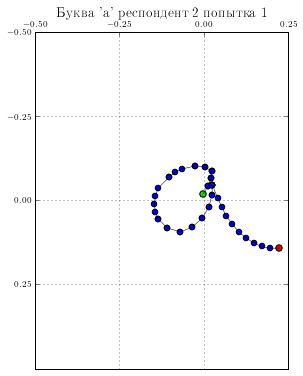

In [108]:
ind = (lexicon['a'], 1, 0)
#vis_letters(ind, real_data_full, figsize=frame_size/3)
vis_letters3(ind, trans_real_data, figsize=frame_size/3)

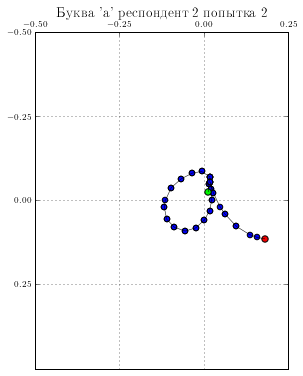

In [127]:
ind = (lexicon['a'], 10, 1)
#vis_letters(ind, real_data_full, figsize=frame_size/3)
vis_letters3(ind, trans_real_data, figsize=frame_size/3)

In [128]:
ind = (lexicon['a'], 1, 0), (lexicon['a'], 1, 1)
a = trans_real_data[ind[0]].compressed().reshape(2, -1).T
b = trans_real_data[ind[1]].compressed().reshape(2, -1).T
dist, path, D = sigproc.dtw(a, b, do_path=True)

In [129]:
def pr_path(path, name):
    fig = plt.figure()
    ax = fig.gca()
    ax.set_aspect('equal')
    ax.grid()
    ax.plot(path[:, 0], path[:, 1], 'co')
    ax.set_title("For " + name, fontsize=20)

In [130]:
R = (np.sum(a**2, axis=1)[:, np.newaxis] +
                np.sum(b**2, axis=1)[np.newaxis, :] - 2*a.dot(b.T))**(1/2)

In [131]:
D

array([[ 0.018,  0.055,  0.092, ...,  3.702,  3.908,  4.135],
       [ 0.037,  0.055,  0.092, ...,  3.702,  3.908,  4.135],
       [ 0.053,  0.045,  0.054, ...,  3.55 ,  3.761,  3.99 ],
       ..., 
       [ 4.494,  4.511,  4.528, ...,  0.926,  0.899,  0.894],
       [ 4.742,  4.758,  4.775, ...,  0.998,  0.948,  0.926],
       [ 5.011,  5.025,  5.041, ...,  1.093,  1.019,  0.976]])

In [132]:
dist

0.97603134728783492

In [133]:
R

array([[ 0.018,  0.037,  0.037, ...,  0.184,  0.207,  0.226],
       [ 0.018,  0.037,  0.037, ...,  0.184,  0.207,  0.226],
       [ 0.016,  0.008,  0.008, ...,  0.189,  0.211,  0.229],
       ..., 
       [ 0.227,  0.243,  0.243, ...,  0.049,  0.029,  0.024],
       [ 0.249,  0.264,  0.264, ...,  0.072,  0.049,  0.032],
       [ 0.268,  0.283,  0.283, ...,  0.095,  0.071,  0.05 ]])

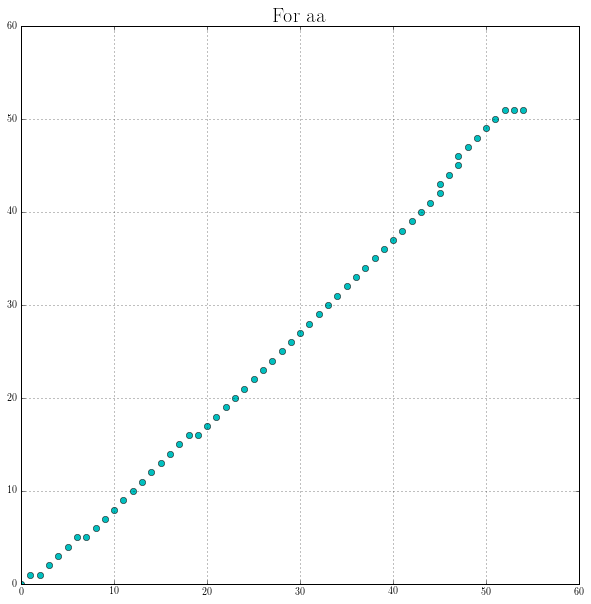

In [135]:
pr_path(path, 'aa')

### 2) Эксперименты, сравнение символов

Train/Test experiment in letter comparison: divided by repetitions

In [60]:
def Letter_compare_predictions(real_data, letter_comparison, fines, alphas, d):
    """Train/Test experiment: divided by repetitions"""
    global lexicon
    models_pred = np.empty((letter_comparison.shape[0], alphas.size,
                            real_data.shape[1]*real_data.shape[2]), dtype=np.str)
    #print(type(models_pred))
    compare_cnt = 0
    N_wr = real_data.shape[1]
    for l1, l2 in letter_comparison:
        #Training
        X_train = real_data[[lexicon[l1], lexicon[l2]], :N_wr, 0].reshape(-1, 2, max_d)
        y_train = np.ones((X_train.shape[0],1))
        y_train[X_train.shape[0]//2:] = -1
        B = sigproc.m_distance_features(X_train, fines=fines)
        linear_models = [svm.smooth_qp_primal_real_solver(X_train, y_train, fines, gamma=1, alpha=alpha, B=B, d=d)
                             for alpha in alphas]
        #Testing
        X_test = real_data[[lexicon[l1], lexicon[l2]], :N_wr, 1].reshape(-1, 2, max_d)
        y_test = np.ones((X_test.shape[0],1))
        y_test[X_test.shape[0]//2:] = -1
        for model_i in range(len(linear_models)):
            model = linear_models[model_i]
            pred = svm.predict(X_test, 'real', 'primal', model['a'], model['b'], X_train, y_train, fines, d=d)
            models_pred[compare_cnt, model_i, (pred==1).ravel()] = l1
            models_pred[compare_cnt, model_i, (pred==-1).ravel()] = l2
        compare_cnt += 1
        return [linear_models[0]['a'].T, linear_models[25]['a'].T, linear_models[75]['a'].T]
    print(type(models_pred))
    return np.array(models_pred)

In [11]:
intervals = np.append(np.linspace(0, 1, num=51), np.linspace(5, 105, num=51))
fines = np.array([0, 0, 0])

compare_arr1 = np.array([['i', 'l'], ['f', 'e'], ['a', 'd']])

In [12]:
import warnings
warnings.simplefilter("error")

In [13]:
X_train = real_data[[lexicon['f'], lexicon['e']], :N_wr, 0].reshape(-1, 2, max_d)
y_train = np.ones((X_train.shape[0],1))
y_train[X_train.shape[0]//2:] = -1

In [ ]:
Result2222.dtype

In [61]:
tm = time.time()
Result2222 = Letter_compare_predictions(real_data, compare_arr1,
                                    fines=fines, alphas=intervals, d=None)
tm = time.time() - tm; print(tm / 60, " min")

KeyboardInterrupt: 

In [56]:
tm = time.time()
a_s = Letter_compare_predictions(real_data, compare_arr1,
                                    fines=fines, alphas=intervals, d=10)
tm = time.time() - tm; print(tm /60, "min")
print(a_s)

KeyboardInterrupt: 

In [18]:
with change_printopt(precision=10):
    print(a_s[2])

[[ 0.0002145972  0.0002145972  0.0002145972 ...,  0.0002145972  0.0002145972  0.0002145972]]


In [117]:
#with change_printopt(threshold=1000):
print(B)

[[     0.     10173.451  13806.961 ...,   8408.762   8890.54   24170.911]
 [ 10173.451      0.      8864.69  ...,  17644.732  15706.268  22027.133]
 [ 13806.961   8864.69       0.    ...,  13729.354  14761.183  25848.99 ]
 ..., 
 [  8408.762  17644.732  13729.354 ...,      0.      6468.126  15200.281]
 [  8890.54   15706.268  14761.183 ...,   6468.126      0.      9280.152]
 [ 24170.911  22027.133  25848.99  ...,  15200.281   9280.152      0.   ]]


In [23]:
d_const=10

In [24]:
tm = time.time()
Result1 = Letter_compare_predictions(real_data, compare_arr1,
                                    fines=fines, alphas=intervals, d=d_const)
tm = time.time() - tm; print(tm / 60, " min")

tm = time.time()
Result2 = Letter_compare_predictions(trans_real_data, compare_arr1 ,
                                    fines=fines, alphas=intervals, d=d_const)
tm = time.time() - tm; print(tm / 60, " min")

0.1300832748413086  min
0.1270302414894104  min


### большое сравнение

In [26]:
compare_arr2 = np.array([['i', 'j'], ['c', 'e'],
                ['u', 'y'], ['h', 'b'], ['h', 'n'],
                ['j', 'y'], ['f', 'y'],
                ['a', 'o'], ['g', 'y'], 
                ['o', 'v'], ['l', 't']])

In [27]:
tm = time.time()
Result3 = Letter_compare_predictions(real_data, compare_arr2,
                                    fines=fines, alphas=intervals, d=d_const)
tm = time.time() - tm; print(tm / 60, " min")

tm = time.time()
Result4 = Letter_compare_predictions(trans_real_data, compare_arr2,
                                    fines=fines, alphas=intervals, d=d_const)
tm = time.time() - tm; print(tm / 60, " min")

0.158548637231191  min
0.15654964049657186  min


In [28]:
Result13 = np.concatenate((Result1, Result3))
Result24 = np.concatenate((Result2, Result4))
compare_arr12 = np.concatenate((compare_arr1, compare_arr2))

In [29]:
#def score(Result, compare_arr, alphas=intervals):
N_wr = Result1.shape[2]/2
plt.figure()
#plt.ylim(-1, 13)
#plt.xlim(-1, 1)
plt.plot(np.log10(intervals), (Result2 != np.repeat(compare_arr1, 11, axis=-1)[:, np.newaxis]).sum(axis=2).sum(axis=0), c='ro', alpha=1)
plt.plot(np.log10(intervals), (Result1 != np.repeat(compare_arr1, 11, axis=-1)[:, np.newaxis]).sum(axis=2).sum(axis=0), c='bo',  alpha=1)
plt.show()

AttributeError: 'list' object has no attribute 'shape'

In [32]:
Result_let_comp = [Result1, Result2, Result3, Result4]

In [33]:
%store Result_let_comp

Stored 'Result_let_comp' (list)


In [69]:
Result1, Result2, Result3, Result4 = tuple(Result_let_comp)

In [53]:
with change_printopt(threshold=10000):
    print(Result1)

[[['i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l']
  ['i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l']
  ['i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l']
  ['i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l']
  ['i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l']
  ['i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l']
  ['i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l']
  ['i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l']
  ['i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l']
  ['i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l']
  ['i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'i' 'l' 'l' 'l' 'l' 'l' 'l' 'l' 'l' '

### 3) Эксперименты на стандартным таском (не готовы)

In [28]:
def Standard_task(real_data, y_multiarr, fines, alphas, gamma=1, d=None):
    """Train/Test eperiment: divided by repetitions"""
    global y_values, lexicon, max_d
    import time
    tm = time.time()
    n_tm = time.time()
    N_wr = real_data.shape[1]
    N_obj = real_data[:, :-1, :].size / (2*max_d)
    print("---|||--- Standard_task ---|||---",flush=True)
    print(flush=True)
    models_pred = np.empty((N_wr, N_obj, alphas.size), dtype=np.str)
    for wr in range(N_wr):
        #Training
        #########################
        print("Start with writer", wr+1, ": ",(time.time() - tm) / 60, " min from start", flush=True)
        #########################
        train_wrs = np.array(list(set(np.arange(N_wr)) - set([wr])))
        X_train = real_data[:, train_wrs, :].reshape(-1, 2, max_d)
        y_train = y_multiarr[:, train_wrs, :].reshape(-1, 1)
        
        linear_models = [svm.multi_solver(X_train,  y_train, 'real', 'primal', fines=fines, gamma=1, alpha=alpha, d=d)
                              for alpha in alphas]
        #########################
        n_tm = time.time() - n_tm
        print("\t",n_tm / 60, " min for training", flush=True)
        print("\t",(time.time() - tm) / 60, " min from start", flush=True)
        #########################
        print("\tWriter ", wr+1, flush=True)
        print("\tTraining done!", flush=True)
        print(flush=True)
        #Testing
        X_test = real_data[:, wr, :].reshape(-1, 2, max_d)
        y_test = y_multiarr[:, wr, :].reshape(-1, 1)
        for i, model in enumerate(linear_models):
            models_pred[wr, :, i] = svm.multi_predict(X_test, 'real', 'primal',
                                      a_list=model, X_train=X_train, y_train=y_train, fines=fines, d=d)
        #########################
        n_tm = time.time() - n_tm
        print("\t",n_tm / 60, " min for prediction", flush=True)
        print("\t",(time.time() - tm) / 60, " min from start", flush=True)
        #########################
        print("\tWriter ", wr+1, flush=True)
        print("\tTesting done!", flush=True)
        print(flush=True)
    print(flush=True)
    print("---|||--- Time elapsed: ", (time.time() - tm)/60, " min ---|||---")
    
    return models_pred

In [59]:
N_wr = 11
wr=0
fines=np.array([0, 0, 0])
alpha = 1
y = values

train_wrs = np.array(list(set(np.arange(N_wr)) - set([wr])))
X_train = real_data[:, train_wrs, :].reshape(-1, 2, max_d)
y_train = np.tile(y_values,(2, 11, 1)).T[:, train_wrs, :].reshape(-1, 1)
y_cl = np.unique(y_train)[0]
y_bin = -1*np.ones(y_train.shape)
y_bin[y_train == y_cl] = 1

In [ ]:
%%prun  -T standard_task_mini_logger.txt 
Result_standard = Standard_task(real_data, np.tile(y_values,(1, 11, 1)).T,
                                np.array([0, 0, 0]), np.array([1]), d=10)

In [30]:
%prun  -T svm_smooth_real_logger.txt svm.smooth_qp_primal_real_solver(X_train[::4], y_bin[::4], fines=fines, gamma=1, alpha=alpha, verbose=True)

Time elapsed [DTW]:  3167.399015903473


ValueError: operands could not be broadcast together with shapes (310,310) (1,155) 

In [67]:
%prun  -T svm_smooth_real_logger_fast.txt svm.smooth_qp_primal_real_solver(X_train[::4], y_bin[::4], fines=fines, gamma=1, alpha=alpha, verbose=True, d=10)

Time elapsed [DTW]:  1689.9745314121246
Time elapsed [Cone QP preparation]:  0.020390748977661133


ValueError: Rank(A) < p or Rank([P; A; G]) < n

In [35]:
max_time = 0
cnt = 0
for wr in range(11):
    for symb in range(values.size):
        for rep in range(2):
            cnt +=1
            a = real_data[symb, wr, 0].compressed().reshape(2, -1).T
            b = real_data[symb, wr, 0].compressed().reshape(2, -1).T
            tm = time.time() 
            sigproc.dtw(a, b)
            tm = time.time() - tm
            if max_time < tm:
                max_time = tm                
print(max_time / 60, cnt)

0.0016565362612406412 1364


### Скорость DTW сравнения двух букв

In [10]:
fines = np.array([0, 0, 0])

data = trans_real_data.reshape(-1, 2, max_d)

Dist = np.empty((data.shape[0], data.shape[0]), dtype=np.float64)

In [24]:
tm = time.time()
Dist[:682, :682] = sigproc.m_distance_features(data[:682], fines)
tm = time.time() - tm
print(tm / 60)

228.8000824133555


In [ ]:
tm = time.time()
Dist[682:, 682:] = sigproc.m_distance_features(data[682:], fines)
tm = time.time() - tm
print(tm / 60)

In [41]:
tm = time.time()
Dist[:682, 682:] = sigproc.m_distance_features(data[:682], fines, X2=data[682:])
tm = time.time() - tm
print(tm/ 60)

415.3860153357188


In [44]:
Dist[682:, :682] = Dist[:682, 682:].T

In [54]:
%store Dist

Stored 'Dist' (ndarray)


In [57]:
import matplotlib as ml
import matplotlib.pyplot as plt
%matplotlib inline

def dist_vis(Dist):
    fig = plt.figure(figsize=(20, 10))

    ax = fig.add_subplot(111)
    ax.set_title('colorMap')
    plt.imshow(Dist)
    ax.set_aspect('equal')

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.patch.set_alpha(0)
    cax.set_frame_on(False)
    plt.colorbar(orientation='vertical')
    plt.show()

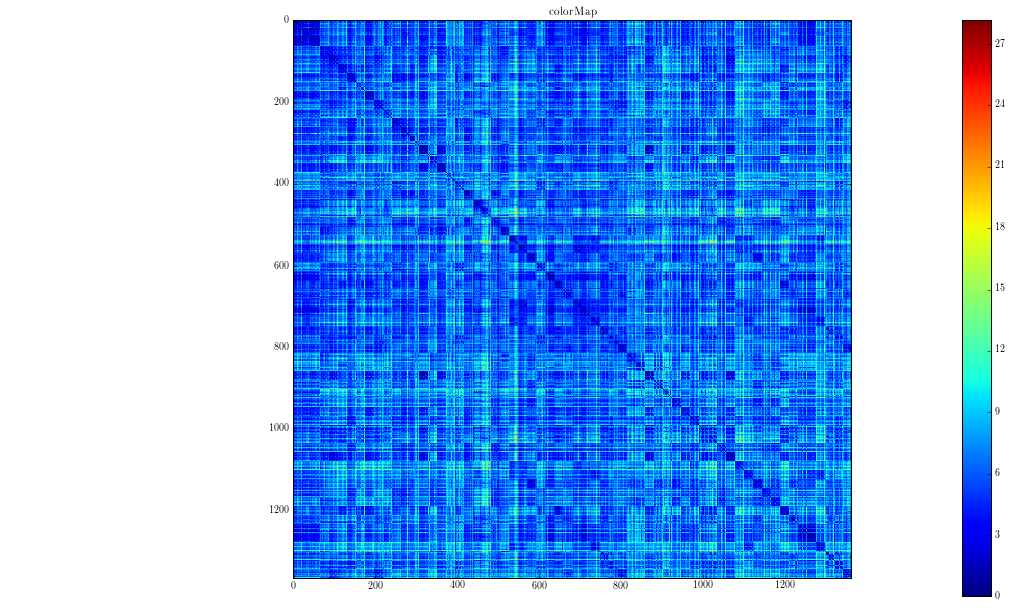

In [58]:
dist_vis(Dist)

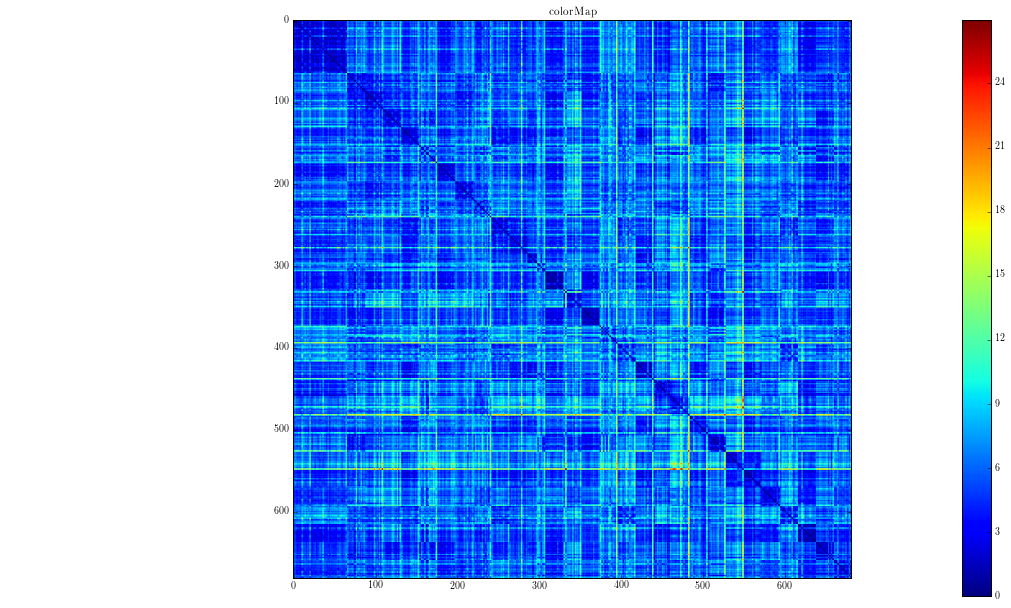

In [59]:
dist_vis(Dist[:682,:682])

In [68]:
print("Procent of <3: {:.5%}".format(np.sum(Dist < 3) / np.prod(Dist.shape)))

Procent of <3: 4.67617%


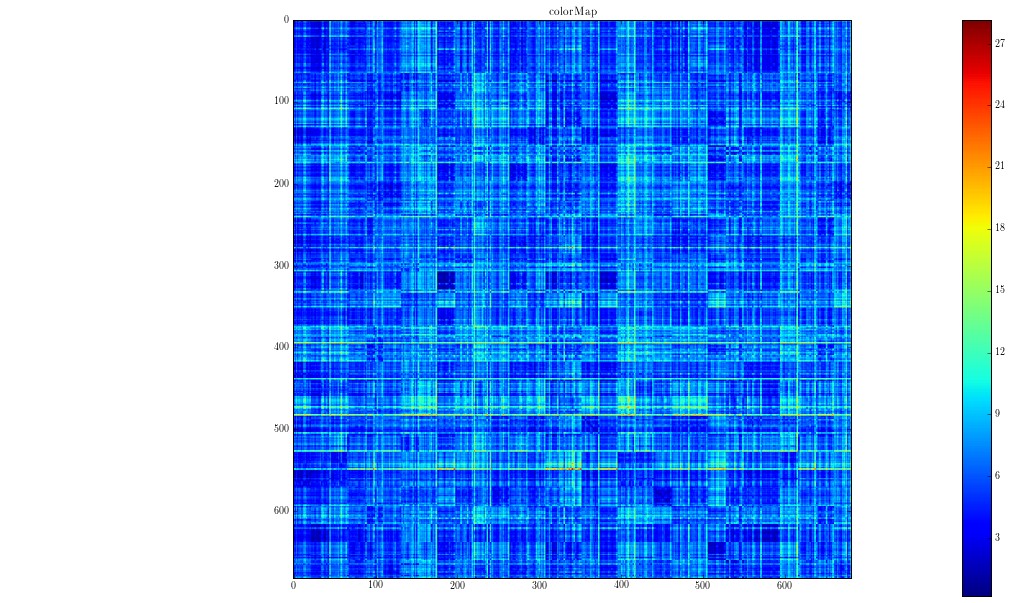

In [60]:
dist_vis(Dist[:682, 682:])

In [31]:
import ipyparallel as ipp
c = ipp.Client()

In [34]:
dview = c[:]
dview.scatter('data', data)

<AsyncResult: scatter>